In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

#Pembangunan Model

##Data Preparation

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/joshuasir/clickbait_headline_research/main/all_agree_sampled.csv')
data.drop_duplicates(subset='title',inplace=True,ignore_index=True)
data['title'] = data['title'].apply(lambda x: x.strip())
data

,Unnamed: 0,title,label,label_score
0,2449,Ini Rincian Skema Biaya Pembangunan Ibu Kota Baru,clickbait,1
1,3177,"Heboh Warga Ramai , di Makam BJ Habibie, Netiz...",clickbait,1
2,3684,Seksinya Cinta Laura Bergaya bak Princess Jasmine,clickbait,1
3,8236,7 Potret Aksi Keren Awkarin Saat Demo Mahasisw...,clickbait,1
4,8150,J-Hope BTS Dan Becky G Siap Keluarkan Lagu Kol...,clickbait,1
...,...,...,...,...
6621,5924,Pengamat Nilai Tidak Elok Pimpinan KPK Kembali...,non-clickbait,0
6622,1672,Pemprov DKI: Trotoar di Tengah Jalan Kalimalan...,non-clickbait,0
6623,5057,"Jelang Munas Golkar, Kader Diminta Tak Mengara...",non-clickbait,0
6624,7924,10.000 Orang Di Wamena Telah Mendaftar Untuk D...,non-clickbait,0


In [ ]:
data[data.duplicated(subset='title', keep=False)]

,Unnamed: 0,title,label,label_score
3657,3104,Indonesia Mampu Penuhi Protein Hewani Dalam Ne...,non-clickbait,0
5127,5754,Indonesia Mampu Penuhi Protein Hewani Dalam Ne...,non-clickbait,0


In [ ]:
data.isna().sum()

Unnamed: 0     0
title          0
label          0
label_score    0
dtype: int64

In [ ]:
data['title'] = data['title'].str.replace('https?:\/\/.*[\r\n]*', '')
data['title'] = data['title'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
data

<ipython-input-5-f4637a9f291b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['title'] = data['title'].str.replace('https?:\/\/.*[\r\n]*', '')


,Unnamed: 0,title,label,label_score
0,2449,Ini Rincian Skema Biaya Pembangunan Ibu Kota Baru,clickbait,1
1,3177,"Heboh Warga Ramai , di Makam BJ Habibie, Netiz...",clickbait,1
2,3684,Seksinya Cinta Laura Bergaya bak Princess Jasmine,clickbait,1
3,8236,7 Potret Aksi Keren Awkarin Saat Demo Mahasisw...,clickbait,1
4,8150,J-Hope BTS Dan Becky G Siap Keluarkan Lagu Kol...,clickbait,1
...,...,...,...,...
6621,5924,Pengamat Nilai Tidak Elok Pimpinan KPK Kembali...,non-clickbait,0
6622,1672,Pemprov DKI: Trotoar di Tengah Jalan Kalimalan...,non-clickbait,0
6623,5057,"Jelang Munas Golkar, Kader Diminta Tak Mengara...",non-clickbait,0
6624,7924,10.000 Orang Di Wamena Telah Mendaftar Untuk D...,non-clickbait,0


In [ ]:
data.drop(['Unnamed: 0', 'label'], axis=1, inplace=True)
data

,title,label_score
0,Ini Rincian Skema Biaya Pembangunan Ibu Kota Baru,1
1,"Heboh Warga Ramai , di Makam BJ Habibie, Netiz...",1
2,Seksinya Cinta Laura Bergaya bak Princess Jasmine,1
3,7 Potret Aksi Keren Awkarin Saat Demo Mahasisw...,1
4,J-Hope BTS Dan Becky G Siap Keluarkan Lagu Kol...,1
...,...,...
6621,Pengamat Nilai Tidak Elok Pimpinan KPK Kembali...,0
6622,Pemprov DKI: Trotoar di Tengah Jalan Kalimalan...,0
6623,"Jelang Munas Golkar, Kader Diminta Tak Mengara...",0
6624,10.000 Orang Di Wamena Telah Mendaftar Untuk D...,0


In [ ]:
# data['label'] = np.where(data['label'] == 'clickbait', 1, 0)
# data

,Unnamed: 0,title,label,label_score
0,2449,Ini Rincian Skema Biaya Pembangunan Ibu Kota Baru,1,1
1,3177,"Heboh Warga Ramai , di Makam BJ Habibie, Netiz...",1,1
2,3684,Seksinya Cinta Laura Bergaya bak Princess Jasmine,1,1
3,8236,7 Potret Aksi Keren Awkarin Saat Demo Mahasisw...,1,1
4,8150,J-Hope BTS Dan Becky G Siap Keluarkan Lagu Kol...,1,1
...,...,...,...,...
6621,5924,Pengamat Nilai Tidak Elok Pimpinan KPK Kembali...,0,0
6622,1672,Pemprov DKI: Trotoar di Tengah Jalan Kalimalan...,0,0
6623,5057,"Jelang Munas Golkar, Kader Diminta Tak Mengara...",0,0
6624,7924,10.000 Orang Di Wamena Telah Mendaftar Untuk D...,0,0


In [ ]:
data.rename(columns={'label_score':'label'}, inplace=True)
data

,title,label
0,Ini Rincian Skema Biaya Pembangunan Ibu Kota Baru,1
1,"Heboh Warga Ramai , di Makam BJ Habibie, Netiz...",1
2,Seksinya Cinta Laura Bergaya bak Princess Jasmine,1
3,7 Potret Aksi Keren Awkarin Saat Demo Mahasisw...,1
4,J-Hope BTS Dan Becky G Siap Keluarkan Lagu Kol...,1
...,...,...
6621,Pengamat Nilai Tidak Elok Pimpinan KPK Kembali...,0
6622,Pemprov DKI: Trotoar di Tengah Jalan Kalimalan...,0
6623,"Jelang Munas Golkar, Kader Diminta Tak Mengara...",0
6624,10.000 Orang Di Wamena Telah Mendaftar Untuk D...,0


In [ ]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data

,title,label
0,Penggemar Kang Daniel Donasikan 10.000 Keping ...,0
1,"Google Doodle Tampilkan Sosok Chrisye, Lengkap...",0
2,In Picture: Pemprov DKI Hentikan Lelang Tender...,0
3,Jaksa Ungkap Duit Ratusan Juta Habil Marati ke...,0
4,Pemprov Kalsel Kembali Dianugerahi WTN Wiratama,0
...,...,...
6621,"Bahayakan Penerbangan, 250 Liter Miras dan 117...",0
6622,Pelaku Pelecehan Seksual di KRL Diamankan di S...,0
6623,"Januari 2020, PSG dan Spurs Kembali Memburu Dy...",0
6624,Ferry Ardiansyah Alami Kecelakaan Saat Syuting...,0


In [ ]:
for sentence, label in data[:5].to_numpy():
  print(f'sentence : {sentence} ; label : {label}')

sentence : Penggemar Kang Daniel Donasikan 10.000 Keping Album untuk Palang Merah Korea ; label : 0
sentence : Google Doodle Tampilkan Sosok Chrisye, Lengkap dengan Lilin-Lilin Kecil ; label : 0
sentence : In Picture: Pemprov DKI Hentikan Lelang Tender ERP ; label : 0
sentence : Jaksa Ungkap Duit Ratusan Juta Habil Marati ke Kivlan Zen cs ; label : 0
sentence : Pemprov Kalsel Kembali Dianugerahi WTN Wiratama ; label : 0


In [ ]:
data[data['label']==0]

,title,label
0,Penggemar Kang Daniel Donasikan 10.000 Keping ...,0
1,"Google Doodle Tampilkan Sosok Chrisye, Lengkap...",0
2,In Picture: Pemprov DKI Hentikan Lelang Tender...,0
3,Jaksa Ungkap Duit Ratusan Juta Habil Marati ke...,0
4,Pemprov Kalsel Kembali Dianugerahi WTN Wiratama,0
...,...,...
6619,Kartu Merah Nodai Kemenangan Manchester City a...,0
6621,"Bahayakan Penerbangan, 250 Liter Miras dan 117...",0
6622,Pelaku Pelecehan Seksual di KRL Diamankan di S...,0
6623,"Januari 2020, PSG dan Spurs Kembali Memburu Dy...",0


In [ ]:
data[data['label']==1]

,title,label
5,"Polisi yang Dipecat Karena Ketahuan Ngojek, Pu...",1
7,"Nama Anak Ditiru Fans, Franda: Bayimu Tak Pant...",1
9,Jungkook BTS Perdana Muncul di Depan Publik Pa...,1
10,"Sering Menahan Buang Air Kecil, 4 Penyakit Ini...",1
12,"Rosa Meldianti Ikut Kontes Puteri Indonesia, L...",1
...,...,...
6610,"Selain Sebesar Big Ben, 6 Asteroid Raksasa Ini...",1
6611,Begini Upaya Kate Middleton Damaikan Pangeran ...,1
6617,Heboh Video Pria Berhelm Kasari Perempuan,1
6620,Hotman Paris Mendadak Pajang Foto Mesra Syahri...,1


##Modelling

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification, BertTokenizer, BertConfig
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score

In [ ]:
tf.keras.backend.clear_session()
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1',hidden_dropout_prob=.5,num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
check_data = data.iloc[:10]
check_data

,title,label
0,Penggemar Kang Daniel Donasikan 10.000 Keping ...,0
1,"Google Doodle Tampilkan Sosok Chrisye, Lengkap...",0
2,In Picture: Pemprov DKI Hentikan Lelang Tender...,0
3,Jaksa Ungkap Duit Ratusan Juta Habil Marati ke...,0
4,Pemprov Kalsel Kembali Dianugerahi WTN Wiratama,0
5,"Polisi yang Dipecat Karena Ketahuan Ngojek, Pu...",1
6,"Vicky Prasetyo Sedang Berduka, Sang Kakek Meni...",0
7,"Nama Anak Ditiru Fans, Franda: Bayimu Tak Pant...",1
8,"Segera Perpanjang Kontrak, Gaji De Gea Samai G...",0
9,Jungkook BTS Perdana Muncul di Depan Publik Pa...,1


In [ ]:
text = 'Debit Air Makin Tinggi, Pintu Air Karet Siaga 1'

In [ ]:
bert_input = bert_tokenizer.encode_plus(
    text,             # Sample kalimat
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 16,                # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    # return_token_type_ids = True     # Mengembalikan nilai token type id (segment embedding) # 0 adalah input dan 1 untuk next sentence prediction
    )
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
bert_input

{'input_ids': [2, 5138, 18355, 30468, 916, 354, 14059, 57, 112, 868, 3, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]}

In [ ]:
print('Kalimat\t\t:', text)                                           # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: Debit Air Makin Tinggi, Pintu Air Karet Siaga 1
Tokenizer	: ['[CLS]', 'debit', 'air', 'makin', 'tinggi', ',', 'pintu', 'air', 'karet', 'siaga', '1', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [2, 14965, 514, 2855, 717, 30468, 2759, 514, 6145, 14461, 111, 3, 0, 0, 0, 0]
Token Type IDs	: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask	: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


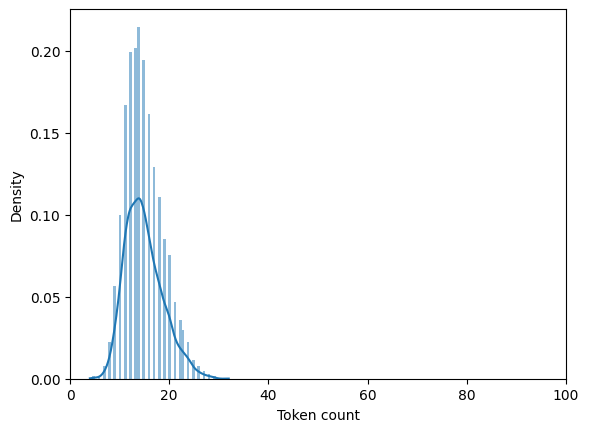

In [ ]:
#From Click-ID dataset
token_lens = []

for txt in data.title:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
max(token_lens)

32

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

In [ ]:
tf.compat.v1.Session(config = config)

In [ ]:
config = tf.compat.v1.ConfigProto(device_count ={'GPU': 0})
sess = tf.compat.v1.Session(config=config)

##Cross Validation -> Click-ID

In [ ]:
data

,title,label
0,Penggemar Kang Daniel Donasikan 10.000 Keping ...,0
1,"Google Doodle Tampilkan Sosok Chrisye, Lengkap...",0
2,In Picture: Pemprov DKI Hentikan Lelang Tender...,0
3,Jaksa Ungkap Duit Ratusan Juta Habil Marati ke...,0
4,Pemprov Kalsel Kembali Dianugerahi WTN Wiratama,0
...,...,...
6621,"Bahayakan Penerbangan, 250 Liter Miras dan 117...",0
6622,Pelaku Pelecehan Seksual di KRL Diamankan di S...,0
6623,"Januari 2020, PSG dan Spurs Kembali Memburu Dy...",0
6624,Ferry Ardiansyah Alami Kecelakaan Saat Syuting...,0


In [ ]:
data['label'].values

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

In [ ]:
bert_tokenizer

BertTokenizer(name_or_path='indobenchmark/indobert-base-p1', vocab_size=30521, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [ ]:
BATCH_SIZE = 64
MAX_LENGTH = 32
SHUFFLE_BUFFER_SIZE=100

In [ ]:
import tensorflow_datasets as tfds

def convert_sentence_to_features(sentence,tokenizer):
    return tokenizer.encode_plus(
        sentence,
        max_length=MAX_LENGTH,
        add_special_tokens=True,
        padding='max_length',
        return_attention_mask=True,
        return_token_type_ids=False,
        truncation=True
    )
def map_features_to_dict(input_ids_list, attention_masks_list, label_list,token_type_ids_list=[]):
    dict_={}
    if len(token_type_ids_list) > 0:
      dict_ = {
        'input_ids': input_ids_list,
        'token_type_ids' : token_type_ids_list,
        'attention_mask': attention_masks_list,
      }, label_list
    else:
      dict_ = {
        'input_ids': input_ids_list,
        'attention_mask': attention_masks_list,
      }, label_list
    return dict_

def encode_sentences(dataset,tokenizer):
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []
    tensor_dataset = []
    for message, label in tfds.as_numpy(dataset):
        bert_input = convert_sentence_to_features(message.decode(),tokenizer)
        input_ids_list.append(bert_input['input_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append([label])

        if 'token_type_ids' in bert_input:
          token_type_ids_list.append(bert_input['token_type_ids'])

    if len(token_type_ids_list) > 0:
      tensor_dataset = tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, label_list, token_type_ids_list))
    else:
      tensor_dataset = tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, label_list))

    return tensor_dataset.map(map_features_to_dict)

In [ ]:
def build_model():
  model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1',hidden_dropout_prob=.5,num_labels=2)
  model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=9e-6, epsilon=1e-11),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model

In [ ]:
def plot_graphs(history, string, fold):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig(f'val_acc fold {fold}.png')
  plt.show()

In [ ]:
def plot_graphs(acc, val_acc, fold):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig(f'val_acc fold {fold}.png')
  plt.show()

In [ ]:
def plot_acc_loss(hist, fold):
  hist = pd.DataFrame(hist.history)
  hist[['accuracy','val_accuracy']].plot()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.savefig(f'val_acc fold {fold}.png')
  plt.show()
  # hist[['loss','val_loss']].plot()
  # plt.savefig(name)
  # plt.show()

###Find Best Epoch

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=7,restore_best_weights=True),
    # tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_acc', save_best_weight=True),
    # tensorboard_callback,
    # tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=.2, # multiply the learning rate by 0.2 (reduce by 5x)
    #                                               patience=4, verbose=1, # print out when learning rate goes down
    #                                               min_lr=1e-7),
    # PrintValTrainRatioCallback()
]

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kfold.split(data)):
    print(f'Fold: {fold}, Train set: {len(train_idx)}, Validation set:{len(val_idx)}')

Fold: 0, Train set: 5963, Validation set:663
Fold: 1, Train set: 5963, Validation set:663
Fold: 2, Train set: 5963, Validation set:663
Fold: 3, Train set: 5963, Validation set:663
Fold: 4, Train set: 5963, Validation set:663
Fold: 5, Train set: 5963, Validation set:663
Fold: 6, Train set: 5964, Validation set:662
Fold: 7, Train set: 5964, Validation set:662
Fold: 8, Train set: 5964, Validation set:662
Fold: 9, Train set: 5964, Validation set:662


In [ ]:
# VALIDATION_ACCURACY = []
# VALIDATON_LOSS = []
# FOLD = []
# f1_scores = []
min_val_losses = []
min_epochs = []
all_val_losses = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(data)):
  tf.keras.backend.clear_session()
  print(f'===== Fold: {fold+1} =====')

  # Split data into training and validation sets
  train_data = data.iloc[train_idx]
  val_data = data.iloc[val_idx]

  # Prepare data for training
  tensor_train = tf.data.Dataset.from_tensor_slices((train_data['title'].values,train_data['label'].values))
  tensor_valid = tf.data.Dataset.from_tensor_slices((val_data['title'].values,val_data['label'].values))

  ds_train_encoded_bert = encode_sentences(tensor_train,tokenizer=bert_tokenizer).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
  ds_valid_encoded_bert = encode_sentences(tensor_valid,tokenizer=bert_tokenizer).batch(BATCH_SIZE)


  # Train the model
  model = build_model()
  history = model.fit(ds_train_encoded_bert, epochs=50, validation_data=ds_valid_encoded_bert, callbacks=callbacks)
  loss_hist = history.history['val_loss']

  all_val_losses.append(loss_hist)

  min_val_loss = np.min(loss_hist)
  min_epoch = np.argmin(loss_hist) + 1
  print('val_loss terkecil : ', min_val_loss)
  print('epoch dengan val_loss terkecil : ', min_epoch)

  min_val_losses.append(min_val_loss)
  min_epochs.append(min_epoch)

===== Fold: 1 =====


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 62s 445ms/step - loss: 0.4459 - accuracy: 0.7845 - val_loss: 0.3152 - val_accuracy: 0.8854
Epoch 2/50
94/94 [==============================] - 38s 408ms/step - loss: 0.2426 - accuracy: 0.9101 - val_loss: 0.2488 - val_accuracy: 0.9155
Epoch 3/50
94/94 [==============================] - 38s 403ms/step - loss: 0.2010 - accuracy: 0.9229 - val_loss: 0.2422 - val_accuracy: 0.9201
Epoch 4/50
94/94 [==============================] - 38s 404ms/step - loss: 0.1751 - accuracy: 0.9348 - val_loss: 0.2493 - val_accuracy: 0.9155
Epoch 5/50
94/94 [==============================] - 39s 419ms/step - loss: 0.1564 - accuracy: 0.9395 - val_loss: 0.2612 - val_accuracy: 0.9095
Epoch 6/50
94/94 [==============================] - 40s 420ms/step - loss: 0.1376 - accuracy: 0.9497 - val_loss: 0.2529 - val_accuracy: 0.9231
Epoch 7/50
94/94 [==============================] - 40s 423ms/step - loss: 0.1266 - accuracy: 0.9534 - val_loss: 0.2876 - val_accuracy: 0.9216

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 62s 467ms/step - loss: 0.4462 - accuracy: 0.7865 - val_loss: 0.3187 - val_accuracy: 0.8627
Epoch 2/50
94/94 [==============================] - 40s 423ms/step - loss: 0.2446 - accuracy: 0.9051 - val_loss: 0.2704 - val_accuracy: 0.8929
Epoch 3/50
94/94 [==============================] - 39s 415ms/step - loss: 0.1984 - accuracy: 0.9220 - val_loss: 0.2320 - val_accuracy: 0.9140
Epoch 4/50
94/94 [==============================] - 40s 426ms/step - loss: 0.1760 - accuracy: 0.9317 - val_loss: 0.2300 - val_accuracy: 0.9186
Epoch 5/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1559 - accuracy: 0.9415 - val_loss: 0.2512 - val_accuracy: 0.9095
Epoch 6/50
94/94 [==============================] - 40s 421ms/step - loss: 0.1484 - accuracy: 0.9431 - val_loss: 0.2442 - val_accuracy: 0.9216
Epoch 7/50
94/94 [==============================] - 40s 426ms/step - loss: 0.1422 - accuracy: 0.9502 - val_loss: 0.2272 - val_accuracy: 0.9306

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 60s 449ms/step - loss: 0.4553 - accuracy: 0.7694 - val_loss: 0.2232 - val_accuracy: 0.9140
Epoch 2/50
94/94 [==============================] - 40s 424ms/step - loss: 0.2415 - accuracy: 0.9073 - val_loss: 0.2041 - val_accuracy: 0.9291
Epoch 3/50
94/94 [==============================] - 40s 423ms/step - loss: 0.1996 - accuracy: 0.9250 - val_loss: 0.2049 - val_accuracy: 0.9231
Epoch 4/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1791 - accuracy: 0.9307 - val_loss: 0.2114 - val_accuracy: 0.9276
Epoch 5/50
94/94 [==============================] - 40s 421ms/step - loss: 0.1554 - accuracy: 0.9430 - val_loss: 0.2085 - val_accuracy: 0.9336
Epoch 6/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1442 - accuracy: 0.9470 - val_loss: 0.2113 - val_accuracy: 0.9367
Epoch 7/50
94/94 [==============================] - 40s 421ms/step - loss: 0.1319 - accuracy: 0.9530 - val_loss: 0.2150 - val_accuracy: 0.9336

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 59s 456ms/step - loss: 0.4313 - accuracy: 0.8008 - val_loss: 0.2356 - val_accuracy: 0.9110
Epoch 2/50
94/94 [==============================] - 39s 417ms/step - loss: 0.2502 - accuracy: 0.8987 - val_loss: 0.2154 - val_accuracy: 0.9246
Epoch 3/50
94/94 [==============================] - 39s 419ms/step - loss: 0.2050 - accuracy: 0.9220 - val_loss: 0.2110 - val_accuracy: 0.9246
Epoch 4/50
94/94 [==============================] - 39s 418ms/step - loss: 0.1722 - accuracy: 0.9386 - val_loss: 0.2248 - val_accuracy: 0.9261
Epoch 5/50
94/94 [==============================] - 40s 425ms/step - loss: 0.1632 - accuracy: 0.9400 - val_loss: 0.1875 - val_accuracy: 0.9336
Epoch 6/50
94/94 [==============================] - 38s 409ms/step - loss: 0.1506 - accuracy: 0.9448 - val_loss: 0.2239 - val_accuracy: 0.9276
Epoch 7/50
94/94 [==============================] - 40s 421ms/step - loss: 0.1367 - accuracy: 0.9509 - val_loss: 0.2046 - val_accuracy: 0.9336

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 59s 454ms/step - loss: 0.4523 - accuracy: 0.7825 - val_loss: 0.1847 - val_accuracy: 0.9306
Epoch 2/50
94/94 [==============================] - 39s 411ms/step - loss: 0.2474 - accuracy: 0.9037 - val_loss: 0.1505 - val_accuracy: 0.9382
Epoch 3/50
94/94 [==============================] - 40s 424ms/step - loss: 0.1978 - accuracy: 0.9276 - val_loss: 0.1505 - val_accuracy: 0.9412
Epoch 4/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1851 - accuracy: 0.9286 - val_loss: 0.1518 - val_accuracy: 0.9427
Epoch 5/50
94/94 [==============================] - 40s 425ms/step - loss: 0.1626 - accuracy: 0.9410 - val_loss: 0.1498 - val_accuracy: 0.9427
Epoch 6/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1470 - accuracy: 0.9468 - val_loss: 0.1573 - val_accuracy: 0.9412
Epoch 7/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1382 - accuracy: 0.9473 - val_loss: 0.1521 - val_accuracy: 0.9427

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 60s 467ms/step - loss: 0.4334 - accuracy: 0.8011 - val_loss: 0.2171 - val_accuracy: 0.9125
Epoch 2/50
94/94 [==============================] - 40s 422ms/step - loss: 0.2406 - accuracy: 0.9086 - val_loss: 0.1825 - val_accuracy: 0.9306
Epoch 3/50
94/94 [==============================] - 40s 425ms/step - loss: 0.2006 - accuracy: 0.9232 - val_loss: 0.1765 - val_accuracy: 0.9351
Epoch 4/50
94/94 [==============================] - 40s 424ms/step - loss: 0.1795 - accuracy: 0.9322 - val_loss: 0.1703 - val_accuracy: 0.9412
Epoch 5/50
94/94 [==============================] - 40s 425ms/step - loss: 0.1562 - accuracy: 0.9442 - val_loss: 0.1623 - val_accuracy: 0.9457
Epoch 6/50
94/94 [==============================] - 40s 421ms/step - loss: 0.1500 - accuracy: 0.9463 - val_loss: 0.1768 - val_accuracy: 0.9442
Epoch 7/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1437 - accuracy: 0.9470 - val_loss: 0.1827 - val_accuracy: 0.9427

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 58s 454ms/step - loss: 0.4373 - accuracy: 0.7951 - val_loss: 0.2612 - val_accuracy: 0.9124
Epoch 2/50
94/94 [==============================] - 38s 405ms/step - loss: 0.2411 - accuracy: 0.9048 - val_loss: 0.1973 - val_accuracy: 0.9305
Epoch 3/50
94/94 [==============================] - 38s 407ms/step - loss: 0.1961 - accuracy: 0.9237 - val_loss: 0.1840 - val_accuracy: 0.9381
Epoch 4/50
94/94 [==============================] - 38s 405ms/step - loss: 0.1767 - accuracy: 0.9316 - val_loss: 0.1847 - val_accuracy: 0.9426
Epoch 5/50
94/94 [==============================] - 38s 408ms/step - loss: 0.1598 - accuracy: 0.9388 - val_loss: 0.2106 - val_accuracy: 0.9366
Epoch 6/50
94/94 [==============================] - 40s 421ms/step - loss: 0.1438 - accuracy: 0.9485 - val_loss: 0.1964 - val_accuracy: 0.9411
Epoch 7/50
94/94 [==============================] - 38s 407ms/step - loss: 0.1392 - accuracy: 0.9463 - val_loss: 0.1987 - val_accuracy: 0.9411

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 61s 458ms/step - loss: 0.4588 - accuracy: 0.7726 - val_loss: 0.2123 - val_accuracy: 0.9199
Epoch 2/50
94/94 [==============================] - 40s 423ms/step - loss: 0.2464 - accuracy: 0.9033 - val_loss: 0.2100 - val_accuracy: 0.9245
Epoch 3/50
94/94 [==============================] - 39s 415ms/step - loss: 0.2032 - accuracy: 0.9207 - val_loss: 0.1814 - val_accuracy: 0.9350
Epoch 4/50
94/94 [==============================] - 40s 426ms/step - loss: 0.1771 - accuracy: 0.9318 - val_loss: 0.1813 - val_accuracy: 0.9335
Epoch 5/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1617 - accuracy: 0.9400 - val_loss: 0.1921 - val_accuracy: 0.9381
Epoch 6/50
94/94 [==============================] - 39s 410ms/step - loss: 0.1496 - accuracy: 0.9443 - val_loss: 0.1958 - val_accuracy: 0.9366
Epoch 7/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1324 - accuracy: 0.9515 - val_loss: 0.1948 - val_accuracy: 0.9350

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 59s 457ms/step - loss: 0.4382 - accuracy: 0.7926 - val_loss: 0.3928 - val_accuracy: 0.8369
Epoch 2/50
94/94 [==============================] - 39s 418ms/step - loss: 0.2540 - accuracy: 0.9017 - val_loss: 0.2964 - val_accuracy: 0.8867
Epoch 3/50
94/94 [==============================] - 40s 422ms/step - loss: 0.2069 - accuracy: 0.9232 - val_loss: 0.2271 - val_accuracy: 0.9199
Epoch 4/50
94/94 [==============================] - 38s 406ms/step - loss: 0.1750 - accuracy: 0.9354 - val_loss: 0.2282 - val_accuracy: 0.9199
Epoch 5/50
94/94 [==============================] - 38s 408ms/step - loss: 0.1606 - accuracy: 0.9393 - val_loss: 0.2790 - val_accuracy: 0.9048
Epoch 6/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1520 - accuracy: 0.9411 - val_loss: 0.2448 - val_accuracy: 0.9230
Epoch 7/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1379 - accuracy: 0.9480 - val_loss: 0.2396 - val_accuracy: 0.9260

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
94/94 [==============================] - 60s 457ms/step - loss: 0.4195 - accuracy: 0.7964 - val_loss: 0.1904 - val_accuracy: 0.9245
Epoch 2/50
94/94 [==============================] - 40s 423ms/step - loss: 0.2399 - accuracy: 0.9091 - val_loss: 0.1626 - val_accuracy: 0.9381
Epoch 3/50
94/94 [==============================] - 39s 413ms/step - loss: 0.2007 - accuracy: 0.9245 - val_loss: 0.1529 - val_accuracy: 0.9426
Epoch 4/50
94/94 [==============================] - 39s 414ms/step - loss: 0.1748 - accuracy: 0.9361 - val_loss: 0.1524 - val_accuracy: 0.9441
Epoch 5/50
94/94 [==============================] - 40s 426ms/step - loss: 0.1705 - accuracy: 0.9339 - val_loss: 0.1495 - val_accuracy: 0.9486
Epoch 6/50
94/94 [==============================] - 39s 414ms/step - loss: 0.1474 - accuracy: 0.9467 - val_loss: 0.1463 - val_accuracy: 0.9441
Epoch 7/50
94/94 [==============================] - 40s 422ms/step - loss: 0.1403 - accuracy: 0.9475 - val_loss: 0.1482 - val_accuracy: 0.9471

In [ ]:
print(np.array(all_val_losses))

[list([0.3151771128177643, 0.24884873628616333, 0.24217283725738525, 0.24933597445487976, 0.26117032766342163, 0.2528841197490692, 0.28756675124168396, 0.2519436776638031, 0.24154692888259888, 0.25719979405403137, 0.26095515489578247, 0.2715607285499573, 0.2733142673969269, 0.2945190370082855, 0.31599077582359314, 0.31783220171928406])
 list([0.3187263607978821, 0.2703778147697449, 0.23198993504047394, 0.2299925982952118, 0.2512260675430298, 0.24418754875659943, 0.22719541192054749, 0.2571723759174347, 0.25546371936798096, 0.25862544775009155, 0.2663792669773102, 0.3091803789138794, 0.3011302649974823, 0.3098076581954956])
 list([0.22322514653205872, 0.20413516461849213, 0.2048964947462082, 0.21136139333248138, 0.20848903059959412, 0.2112717181444168, 0.21500030159950256, 0.2297849804162979, 0.2263571321964264])
 list([0.23564879596233368, 0.21539610624313354, 0.21101114153862, 0.22478774189949036, 0.1874854564666748, 0.22386106848716736, 0.2045801728963852, 0.20022672414779663, 0.2488

<ipython-input-29-40d9e9704054>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(all_val_losses))


In [ ]:
epochs_len = [len(each_hist) for each_hist in all_val_losses]                   #menghitung banyak epoch di tiap fold
min_epoch = min(epochs_len)                                                     #banyak epoch terkecil dari semua fold

trimmed_val_losses = np.array([each_hist[:min_epoch] for each_hist \
                          in all_val_losses])                                   #memotong nilai history sejumlah banyak epoch terkecil

In [ ]:
print('epochs_len : ', epochs_len)
print('min_epoch : ', min_epoch)

epochs_len :  [16, 14, 9, 12, 12, 12, 10, 11, 10, 15]
min_epoch :  9


In [ ]:
print(trimmed_val_losses)

[[0.31517711 0.24884874 0.24217284 0.24933597 0.26117033 0.25288412
  0.28756675 0.25194368 0.24154693]
 [0.31872636 0.27037781 0.23198994 0.2299926  0.25122607 0.24418755
  0.22719541 0.25717238 0.25546372]
 [0.22322515 0.20413516 0.20489649 0.21136139 0.20848903 0.21127172
  0.2150003  0.22978498 0.22635713]
 [0.2356488  0.21539611 0.21101114 0.22478774 0.18748546 0.22386107
  0.20458017 0.20022672 0.24885499]
 [0.18466583 0.15051699 0.15049733 0.15181157 0.14983752 0.15725304
  0.15210751 0.15696435 0.15745437]
 [0.21705446 0.18248972 0.17648995 0.17025699 0.16228466 0.17683758
  0.18268389 0.19379765 0.19617569]
 [0.26116908 0.19727713 0.18400699 0.18468626 0.21058276 0.19635065
  0.1987391  0.19839229 0.21084745]
 [0.21234998 0.20995677 0.18140997 0.18134971 0.1920744  0.19575058
  0.19477123 0.18664499 0.22360511]
 [0.39281139 0.29638037 0.22707227 0.22819541 0.2789807  0.24480312
  0.23962697 0.26133311 0.31067866]
 [0.19037212 0.16259196 0.15288804 0.15240309 0.14951986 0.14627

In [ ]:
for idx, each_fold in enumerate(trimmed_val_losses):
  print('\n')
  print(f'=== Fold {idx+1} ===')
  for i in each_fold:
    print(round(i, 8))



=== Fold 1 ===
0.31517711
0.24884874
0.24217284
0.24933597
0.26117033
0.25288412
0.28756675
0.25194368
0.24154693


=== Fold 2 ===
0.31872636
0.27037781
0.23198994
0.2299926
0.25122607
0.24418755
0.22719541
0.25717238
0.25546372


=== Fold 3 ===
0.22322515
0.20413516
0.20489649
0.21136139
0.20848903
0.21127172
0.2150003
0.22978498
0.22635713


=== Fold 4 ===
0.2356488
0.21539611
0.21101114
0.22478774
0.18748546
0.22386107
0.20458017
0.20022672
0.24885499


=== Fold 5 ===
0.18466583
0.15051699
0.15049733
0.15181157
0.14983752
0.15725304
0.15210751
0.15696435
0.15745437


=== Fold 6 ===
0.21705446
0.18248972
0.17648995
0.17025699
0.16228466
0.17683758
0.18268389
0.19379765
0.19617569


=== Fold 7 ===
0.26116908
0.19727713
0.18400699
0.18468626
0.21058276
0.19635065
0.1987391
0.19839229
0.21084745


=== Fold 8 ===
0.21234998
0.20995677
0.18140997
0.18134971
0.1920744
0.19575058
0.19477123
0.18664499
0.22360511


=== Fold 9 ===
0.39281139
0.29638037
0.22707227
0.22819541
0.2789807
0.2448

In [ ]:
avg_val_loss = np.sum(trimmed_val_losses, axis=0)/10                             #menambah nilai val_loss di tiap epoch dengan nilai val_loss di epoch yang sama dari masing-masing fold

optimal_epoch = np.argmin(avg_val_loss) + 1                                     #mencari epoch dengan nilai val_loss terkecil

In [ ]:
print('avg_val_loss : ', avg_val_loss)
print('optimal_epoch : ', optimal_epoch)

avg_val_loss :  [0.25512003 0.21379708 0.1962435  0.19841807 0.20516508 0.20494706
 0.20504271 0.20605843 0.22097506]
optimal_epoch :  3


In [ ]:
for i in avg_val_loss:
  print(i)

0.2551200270652771
0.21379707604646683
0.19624349623918533
0.19841807335615158
0.20516507923603058
0.20494706481695174
0.20504271388053893
0.20605843067169188
0.22097505629062653


In [ ]:
print('min_val_losses :' , min_val_losses)

min_val_losses : [0.24154692888259888, 0.22719541192054749, 0.20413516461849213, 0.1874854564666748, 0.14983752369880676, 0.16228465735912323, 0.18400698900222778, 0.1813497096300125, 0.22707226872444153, 0.12432417273521423]


In [ ]:
print('min_epochs :', min_epochs)

min_epochs : [9, 7, 2, 5, 5, 5, 3, 4, 3, 8]


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kfold.split(data)):
    print(f'Fold: {fold}, Train set: {len(train_idx)}, Validation set:{len(val_idx)}')

Fold: 0, Train set: 5963, Validation set:663
Fold: 1, Train set: 5963, Validation set:663
Fold: 2, Train set: 5963, Validation set:663
Fold: 3, Train set: 5963, Validation set:663
Fold: 4, Train set: 5963, Validation set:663
Fold: 5, Train set: 5963, Validation set:663
Fold: 6, Train set: 5964, Validation set:662
Fold: 7, Train set: 5964, Validation set:662
Fold: 8, Train set: 5964, Validation set:662
Fold: 9, Train set: 5964, Validation set:662


In [ ]:
VALIDATION_ACCURACY = []
VALIDATON_LOSS = []
# FOLD = []
f1_scores = []
precision_scores = []
recall_scores = []
tps = []
tns = []
fps = []
fns = []


for fold, (train_idx, val_idx) in enumerate(kfold.split(data)):
  # FOLD.append(f'Fold {fold}')
  tf.keras.backend.clear_session()
  print(f'========== Fold: {fold} ==========')

  # Split data into training and validation sets
  train_data = data.iloc[train_idx]
  val_data = data.iloc[val_idx]

  # Prepare data for training
  tensor_train = tf.data.Dataset.from_tensor_slices((train_data['title'].values,train_data['label'].values))
  tensor_valid = tf.data.Dataset.from_tensor_slices((val_data['title'].values,val_data['label'].values))

  ds_train_encoded_bert = encode_sentences(tensor_train,tokenizer=bert_tokenizer).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
  ds_valid_encoded_bert = encode_sentences(tensor_valid,tokenizer=bert_tokenizer).batch(BATCH_SIZE)


  # Train the model
  model = build_model()
  history = model.fit(ds_train_encoded_bert, epochs=6)

  # Evaluate the model on the test set
  test_loss, test_acc = model.evaluate(ds_valid_encoded_bert)
  y_preds = model.predict(ds_valid_encoded_bert)[0]
  y_pred_labels = np.argmax(y_preds, axis=1)
  prec = precision_score(val_data['label'],y_pred_labels)
  recall = recall_score(val_data['label'],y_pred_labels)
  f1 = f1_score(val_data['label'],y_pred_labels)
  tn, fp, fn, tp = confusion_matrix(val_data['label'],y_pred_labels).ravel()
  print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')
  print('Precision score :', prec)
  print('Recall score :', recall)
  print('F1 score :', f1)
  print('Confusion Matrix :')
  print(confusion_matrix(val_data['label'], y_pred_labels, labels=[1,0]))
  print(f'TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}')
  print('\n')

  VALIDATION_ACCURACY.append(test_acc)
  VALIDATON_LOSS.append(test_loss)
  precision_scores.append(prec)
  recall_scores.append(recall)
  f1_scores.append(f1)
  tps.append(tp)
  tns.append(tn)
  fps.append(fp)
  fns.append(fn)

========== Fold: 0 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 56s 415ms/step - loss: 0.4270 - accuracy: 0.7966
Epoch 2/6
94/94 [==============================] - 40s 428ms/step - loss: 0.2468 - accuracy: 0.9073
Epoch 3/6
94/94 [==============================] - 39s 413ms/step - loss: 0.1967 - accuracy: 0.9254
Epoch 4/6
94/94 [==============================] - 39s 415ms/step - loss: 0.1718 - accuracy: 0.9356
Epoch 5/6
94/94 [==============================] - 38s 409ms/step - loss: 0.1594 - accuracy: 0.9376
Epoch 6/6
11/11 [==============================] - 4s 133ms/step
Test loss: 0.24762551486492157, Test accuracy: 0.930618405342102
Precision score : 0.953416149068323
Recall score : 0.908284023668639
F1 score : 0.9303030303030303
Confusion Matrix :
[[307  31]
 [ 15 310]]
TP: 307, TN: 310, FP: 15, FN: 31


========== Fold: 1 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 55s 410ms/step - loss: 0.4287 - accuracy: 0.8058
Epoch 2/6
94/94 [==============================] - 38s 406ms/step - loss: 0.2434 - accuracy: 0.9073
Epoch 3/6
94/94 [==============================] - 38s 407ms/step - loss: 0.1998 - accuracy: 0.9277
Epoch 4/6
94/94 [==============================] - 38s 406ms/step - loss: 0.1737 - accuracy: 0.9328
Epoch 5/6
94/94 [==============================] - 38s 406ms/step - loss: 0.1700 - accuracy: 0.9371
Epoch 6/6
11/11 [==============================] - 4s 140ms/step
Test loss: 0.2718583643436432, Test accuracy: 0.918552041053772
Precision score : 0.9860627177700348
Recall score : 0.8498498498498499
F1 score : 0.9129032258064517
Confusion Matrix :
[[283  50]
 [  4 326]]
TP: 283, TN: 326, FP: 4, FN: 50


========== Fold: 2 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 56s 410ms/step - loss: 0.4323 - accuracy: 0.7939
Epoch 2/6
94/94 [==============================] - 38s 407ms/step - loss: 0.2386 - accuracy: 0.9081
Epoch 3/6
94/94 [==============================] - 38s 407ms/step - loss: 0.2056 - accuracy: 0.9227
Epoch 4/6
94/94 [==============================] - 38s 408ms/step - loss: 0.1784 - accuracy: 0.9329
Epoch 5/6
94/94 [==============================] - 38s 406ms/step - loss: 0.1642 - accuracy: 0.9431
Epoch 6/6
11/11 [==============================] - 4s 144ms/step
Test loss: 0.22014763951301575, Test accuracy: 0.9260935187339783
Precision score : 0.9272727272727272
Recall score : 0.9244712990936556
F1 score : 0.9258698940998487
Confusion Matrix :
[[306  25]
 [ 24 308]]
TP: 306, TN: 308, FP: 24, FN: 25


========== Fold: 3 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 55s 410ms/step - loss: 0.4297 - accuracy: 0.7917
Epoch 2/6
94/94 [==============================] - 38s 408ms/step - loss: 0.2428 - accuracy: 0.9063
Epoch 3/6
94/94 [==============================] - 38s 407ms/step - loss: 0.2061 - accuracy: 0.9193
Epoch 4/6
94/94 [==============================] - 38s 407ms/step - loss: 0.1798 - accuracy: 0.9333
Epoch 5/6
94/94 [==============================] - 38s 406ms/step - loss: 0.1684 - accuracy: 0.9363
Epoch 6/6
11/11 [==============================] - 4s 141ms/step
Test loss: 0.18625949323177338, Test accuracy: 0.9351432919502258
Precision score : 0.9597523219814241
Recall score : 0.9117647058823529
F1 score : 0.9351432880844646
Confusion Matrix :
[[310  30]
 [ 13 310]]
TP: 310, TN: 310, FP: 13, FN: 30


========== Fold: 4 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 55s 411ms/step - loss: 0.4386 - accuracy: 0.7924
Epoch 2/6
94/94 [==============================] - 38s 406ms/step - loss: 0.2420 - accuracy: 0.9047
Epoch 3/6
94/94 [==============================] - 38s 408ms/step - loss: 0.2050 - accuracy: 0.9264
Epoch 4/6
94/94 [==============================] - 38s 408ms/step - loss: 0.1832 - accuracy: 0.9306
Epoch 5/6
94/94 [==============================] - 38s 407ms/step - loss: 0.1614 - accuracy: 0.9398
Epoch 6/6
11/11 [==============================] - 4s 139ms/step
Test loss: 0.17395451664924622, Test accuracy: 0.9366515874862671
Precision score : 0.9490445859872612
Recall score : 0.9197530864197531
F1 score : 0.9341692789968652
Confusion Matrix :
[[298  26]
 [ 16 323]]
TP: 298, TN: 323, FP: 16, FN: 26


========== Fold: 5 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 55s 411ms/step - loss: 0.4222 - accuracy: 0.8041
Epoch 2/6
94/94 [==============================] - 38s 406ms/step - loss: 0.2422 - accuracy: 0.9026
Epoch 3/6
94/94 [==============================] - 38s 408ms/step - loss: 0.1980 - accuracy: 0.9250
Epoch 4/6
94/94 [==============================] - 38s 406ms/step - loss: 0.1814 - accuracy: 0.9277
Epoch 5/6
94/94 [==============================] - 38s 406ms/step - loss: 0.1565 - accuracy: 0.9410
Epoch 6/6
11/11 [==============================] - 5s 142ms/step
Test loss: 0.16933844983577728, Test accuracy: 0.9441930651664734
Precision score : 0.9440993788819876
Recall score : 0.9411764705882353
F1 score : 0.9426356589147287
Confusion Matrix :
[[304  19]
 [ 18 322]]
TP: 304, TN: 322, FP: 18, FN: 19


========== Fold: 6 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 55s 411ms/step - loss: 0.4572 - accuracy: 0.7812
Epoch 2/6
94/94 [==============================] - 38s 406ms/step - loss: 0.2530 - accuracy: 0.9004
Epoch 3/6
94/94 [==============================] - 38s 407ms/step - loss: 0.1963 - accuracy: 0.9225
Epoch 4/6
94/94 [==============================] - 38s 407ms/step - loss: 0.1762 - accuracy: 0.9289
Epoch 5/6
94/94 [==============================] - 38s 407ms/step - loss: 0.1616 - accuracy: 0.9390
Epoch 6/6
11/11 [==============================] - 5s 138ms/step
Test loss: 0.187260702252388, Test accuracy: 0.9501510858535767
Precision score : 0.9617834394904459
Recall score : 0.934984520123839
F1 score : 0.9481946624803768
Confusion Matrix :
[[302  21]
 [ 12 327]]
TP: 302, TN: 327, FP: 12, FN: 21


========== Fold: 7 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 55s 411ms/step - loss: 0.4270 - accuracy: 0.8025
Epoch 2/6
94/94 [==============================] - 38s 407ms/step - loss: 0.2393 - accuracy: 0.9078
Epoch 3/6
94/94 [==============================] - 38s 408ms/step - loss: 0.1974 - accuracy: 0.9274
Epoch 4/6
94/94 [==============================] - 38s 408ms/step - loss: 0.1786 - accuracy: 0.9299
Epoch 5/6
94/94 [==============================] - 38s 407ms/step - loss: 0.1613 - accuracy: 0.9418
Epoch 6/6
11/11 [==============================] - 5s 138ms/step
Test loss: 0.17113713920116425, Test accuracy: 0.9471299052238464
Precision score : 0.9520958083832335
Recall score : 0.9436201780415431
F1 score : 0.9478390461997019
Confusion Matrix :
[[318  19]
 [ 16 309]]
TP: 318, TN: 309, FP: 16, FN: 19


========== Fold: 8 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 56s 412ms/step - loss: 0.4420 - accuracy: 0.7874
Epoch 2/6
94/94 [==============================] - 38s 408ms/step - loss: 0.2375 - accuracy: 0.9113
Epoch 3/6
94/94 [==============================] - 38s 408ms/step - loss: 0.1926 - accuracy: 0.9257
Epoch 4/6
94/94 [==============================] - 38s 409ms/step - loss: 0.1779 - accuracy: 0.9331
Epoch 5/6
94/94 [==============================] - 38s 409ms/step - loss: 0.1561 - accuracy: 0.9450
Epoch 6/6
11/11 [==============================] - 6s 134ms/step
Test loss: 0.256797730922699, Test accuracy: 0.9154078364372253
Precision score : 0.9716088328075709
Recall score : 0.8676056338028169
F1 score : 0.9166666666666666
Confusion Matrix :
[[308  47]
 [  9 298]]
TP: 308, TN: 298, FP: 9, FN: 47


========== Fold: 9 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
94/94 [==============================] - 55s 410ms/step - loss: 0.4520 - accuracy: 0.7755
Epoch 2/6
94/94 [==============================] - 38s 408ms/step - loss: 0.2429 - accuracy: 0.9066
Epoch 3/6
94/94 [==============================] - 38s 407ms/step - loss: 0.2077 - accuracy: 0.9222
Epoch 4/6
94/94 [==============================] - 38s 408ms/step - loss: 0.1733 - accuracy: 0.9375
Epoch 5/6
94/94 [==============================] - 38s 407ms/step - loss: 0.1591 - accuracy: 0.9388
Epoch 6/6
11/11 [==============================] - 6s 133ms/step
Test loss: 0.15616895258426666, Test accuracy: 0.9501510858535767
Precision score : 0.9601328903654485
Recall score : 0.932258064516129
F1 score : 0.9459901800327332
Confusion Matrix :
[[289  21]
 [ 12 340]]
TP: 289, TN: 340, FP: 12, FN: 21




In [ ]:
print('Average Accuracy : ', np.mean(VALIDATION_ACCURACY))
print('Average Loss : ', np.mean(VALIDATON_LOSS))
print('Average Precision : ', np.mean(precision_scores))
print('Average Recall : ', np.mean(recall_scores))
print('Average F1-score : ', np.mean(f1_scores))

Average Accuracy :  0.9354091823101044
Average Loss :  0.20405485033988952
Average Precision :  0.9565268852008456
Average Recall :  0.9133767831986814
Average F1-score :  0.9339714931584868


In [ ]:
from math import ceil
print('Average True Positive : ', ceil(np.mean(tps)))
print('Average True Negative : ', ceil(np.mean(tns)))
print('Average False Positive : ', ceil(np.mean(fps)))
print('Average False Negative : ', ceil(np.mean(fns)))

Average True Positive :  303
Average True Negative :  318
Average False Positive :  14
Average False Negative :  29


In [ ]:
VALIDATION_ACCURACY = [0.930618405342102, 0.918552041053772, 0.9260935187339783, 0.9351432919502258, 0.9366515874862671,
                       0.9441930651664734, 0.9501510858535767, 0.9471299052238464, 0.9154078364372253, 0.9501510858535767]
VALIDATON_LOSS = [0.24762551486492157, 0.2718583643436432, 0.22014763951301575, 0.18625949323177338, 0.17395451664924622,
                  0.16933844983577728, 0.187260702252388, 0.17113713920116425, 0.256797730922699, 0.15616895258426666]
f1_scores = [0.9303030303030303, 0.9129032258064517, 0.9258698940998487, 0.9351432880844646, 0.9341692789968652,
             0.9426356589147287, 0.9481946624803768, 0.9478390461997019,  0.9166666666666666, 0.9459901800327332]

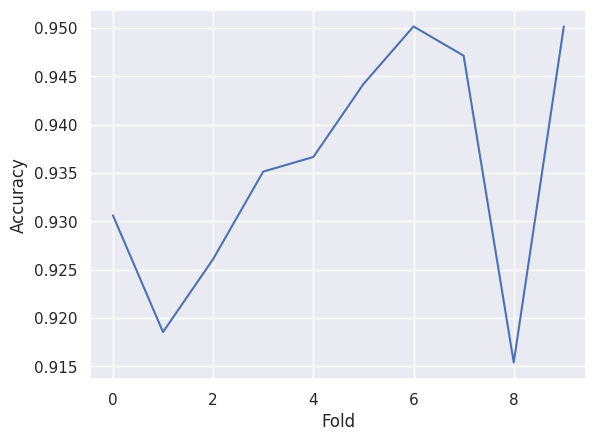

In [ ]:
plt.plot(np.array(VALIDATION_ACCURACY))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.savefig('val_acc.png')
# plt.title('Validation Accuracy Each Fold')

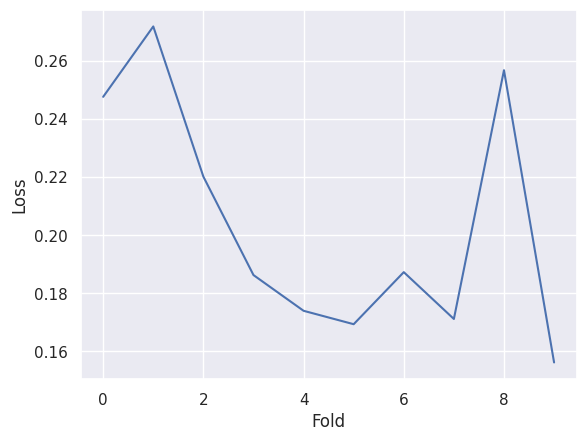

In [ ]:
plt.plot(np.array(VALIDATON_LOSS))
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.savefig('val_loss.png')
# plt.title('Validation Loss Each Fold')

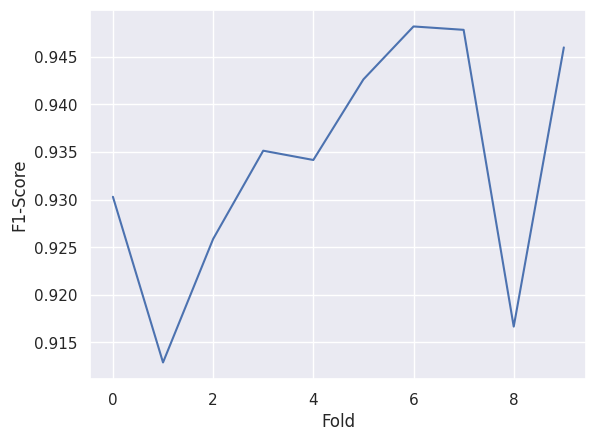

In [ ]:
plt.plot(np.array(f1_scores))
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.savefig('f1scores.png')
# plt.title('Validation F1-Score Each Fold')

###Modelling

In [ ]:
import seaborn as sns
sns.set_theme()

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kfold.split(data)):
    print(f'Fold: {fold}, Train set: {len(train_idx)}, Validation set:{len(val_idx)}')

Fold: 0, Train set: 5963, Validation set:663
Fold: 1, Train set: 5963, Validation set:663
Fold: 2, Train set: 5963, Validation set:663
Fold: 3, Train set: 5963, Validation set:663
Fold: 4, Train set: 5963, Validation set:663
Fold: 5, Train set: 5963, Validation set:663
Fold: 6, Train set: 5964, Validation set:662
Fold: 7, Train set: 5964, Validation set:662
Fold: 8, Train set: 5964, Validation set:662
Fold: 9, Train set: 5964, Validation set:662


In [ ]:
VALIDATION_ACCURACY = []
VALIDATON_LOSS = []
# FOLD = []
f1_scores = []
precision_scores = []
recall_scores = []
tps = []
tns = []
fps = []
fns = []


for fold, (train_idx, val_idx) in enumerate(kfold.split(data)):
  # FOLD.append(f'Fold {fold}')
  tf.keras.backend.clear_session()
  print(f'========== Fold: {fold+1} ==========')

  # Split data into training and validation sets
  train_data = data.iloc[train_idx]
  val_data = data.iloc[val_idx]

  # Prepare data for training
  tensor_train = tf.data.Dataset.from_tensor_slices((train_data['title'].values,train_data['label'].values))
  tensor_valid = tf.data.Dataset.from_tensor_slices((val_data['title'].values,val_data['label'].values))

  ds_train_encoded_bert = encode_sentences(tensor_train,tokenizer=bert_tokenizer).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
  ds_valid_encoded_bert = encode_sentences(tensor_valid,tokenizer=bert_tokenizer).batch(BATCH_SIZE)


  # Train the model
  model = build_model()
  history = model.fit(ds_train_encoded_bert, epochs=3)

  # Evaluate the model on the test set
  test_loss, test_acc = model.evaluate(ds_valid_encoded_bert)
  y_preds = model.predict(ds_valid_encoded_bert)[0]
  y_pred_labels = np.argmax(y_preds, axis=1)
  prec = precision_score(val_data['label'],y_pred_labels)
  recall = recall_score(val_data['label'],y_pred_labels)
  f1 = f1_score(val_data['label'],y_pred_labels)
  tn, fp, fn, tp = confusion_matrix(val_data['label'],y_pred_labels).ravel()
  print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')
  print('Precision score :', prec)
  print('Recall score :', recall)
  print('F1 score :', f1)
  print('Confusion Matrix :')
  print(confusion_matrix(val_data['label'], y_pred_labels, labels=[1,0]))
  print(f'TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}')
  plot_graphs(history, 'accuracy', fold+1)
  print('\n')

  VALIDATION_ACCURACY.append(test_acc)
  VALIDATON_LOSS.append(test_loss)
  precision_scores.append(prec)
  recall_scores.append(recall)
  f1_scores.append(f1)
  tps.append(tp)
  tns.append(tn)
  fps.append(fp)
  fns.append(fn)

========== Fold: 0 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 60s 415ms/step - loss: 0.4269 - accuracy: 0.7994
Epoch 2/3
94/94 [==============================] - 37s 398ms/step - loss: 0.2387 - accuracy: 0.9099
Epoch 3/3
11/11 [==============================] - 4s 136ms/step
Test loss: 0.22751028835773468, Test accuracy: 0.9230769276618958
Precision score : 0.9388379204892966
Recall score : 0.908284023668639
F1 score : 0.9233082706766916
Confusion Matrix :
[[307  31]
 [ 20 305]]
TP: 307, TN: 305, FP: 20, FN: 31


========== Fold: 1 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 56s 408ms/step - loss: 0.4402 - accuracy: 0.7892
Epoch 2/3
94/94 [==============================] - 38s 402ms/step - loss: 0.2386 - accuracy: 0.9049
Epoch 3/3
11/11 [==============================] - 5s 144ms/step
Test loss: 0.18889690935611725, Test accuracy: 0.9291101098060608
Precision score : 0.9642857142857143
Recall score : 0.8918918918918919
F1 score : 0.9266770670826834
Confusion Matrix :
[[297  36]
 [ 11 319]]
TP: 297, TN: 319, FP: 11, FN: 36


========== Fold: 2 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 57s 407ms/step - loss: 0.4625 - accuracy: 0.7743
Epoch 2/3
94/94 [==============================] - 38s 402ms/step - loss: 0.2349 - accuracy: 0.9111
Epoch 3/3
11/11 [==============================] - 5s 140ms/step
Test loss: 0.20099420845508575, Test accuracy: 0.930618405342102
Precision score : 0.9439252336448598
Recall score : 0.9154078549848943
F1 score : 0.9294478527607363
Confusion Matrix :
[[303  28]
 [ 18 314]]
TP: 303, TN: 314, FP: 18, FN: 28


========== Fold: 3 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 57s 406ms/step - loss: 0.4515 - accuracy: 0.7788
Epoch 2/3
94/94 [==============================] - 38s 402ms/step - loss: 0.2357 - accuracy: 0.9111
Epoch 3/3
11/11 [==============================] - 4s 132ms/step
Test loss: 0.2257479578256607, Test accuracy: 0.9276018142700195
Precision score : 0.964968152866242
Recall score : 0.8911764705882353
F1 score : 0.926605504587156
Confusion Matrix :
[[303  37]
 [ 11 312]]
TP: 303, TN: 312, FP: 11, FN: 37


========== Fold: 4 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 58s 407ms/step - loss: 0.4257 - accuracy: 0.8040
Epoch 2/3
94/94 [==============================] - 38s 403ms/step - loss: 0.2410 - accuracy: 0.9101
Epoch 3/3
11/11 [==============================] - 4s 145ms/step
Test loss: 0.1654442995786667, Test accuracy: 0.9396681785583496
Precision score : 0.9465408805031447
Recall score : 0.9290123456790124
F1 score : 0.9376947040498442
Confusion Matrix :
[[301  23]
 [ 17 322]]
TP: 301, TN: 322, FP: 17, FN: 23


========== Fold: 5 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 58s 407ms/step - loss: 0.4508 - accuracy: 0.7763
Epoch 2/3
94/94 [==============================] - 38s 402ms/step - loss: 0.2367 - accuracy: 0.9074
Epoch 3/3
11/11 [==============================] - 5s 137ms/step
Test loss: 0.20151661336421967, Test accuracy: 0.9336349964141846
Precision score : 0.918918918918919
Recall score : 0.9473684210526315
F1 score : 0.9329268292682926
Confusion Matrix :
[[306  17]
 [ 27 313]]
TP: 306, TN: 313, FP: 27, FN: 17


========== Fold: 6 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 59s 407ms/step - loss: 0.4222 - accuracy: 0.8015
Epoch 2/3
94/94 [==============================] - 38s 403ms/step - loss: 0.2342 - accuracy: 0.9076
Epoch 3/3
11/11 [==============================] - 5s 143ms/step
Test loss: 0.1860707849264145, Test accuracy: 0.9365558624267578
Precision score : 0.9194029850746268
Recall score : 0.9535603715170279
F1 score : 0.9361702127659574
Confusion Matrix :
[[308  15]
 [ 27 312]]
TP: 308, TN: 312, FP: 27, FN: 15


========== Fold: 7 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 56s 408ms/step - loss: 0.4508 - accuracy: 0.7740
Epoch 2/3
94/94 [==============================] - 38s 402ms/step - loss: 0.2393 - accuracy: 0.9049
Epoch 3/3
11/11 [==============================] - 5s 131ms/step
Test loss: 0.21023471653461456, Test accuracy: 0.9290030002593994
Precision score : 0.9315476190476191
Recall score : 0.9287833827893175
F1 score : 0.9301634472511144
Confusion Matrix :
[[313  24]
 [ 23 302]]
TP: 313, TN: 302, FP: 23, FN: 24


========== Fold: 8 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 57s 406ms/step - loss: 0.4679 - accuracy: 0.7752
Epoch 2/3
94/94 [==============================] - 38s 403ms/step - loss: 0.2452 - accuracy: 0.9061
Epoch 3/3
11/11 [==============================] - 5s 132ms/step
Test loss: 0.2847592234611511, Test accuracy: 0.9048338532447815
Precision score : 0.9709677419354839
Recall score : 0.847887323943662
F1 score : 0.9052631578947368
Confusion Matrix :
[[301  54]
 [  9 298]]
TP: 301, TN: 298, FP: 9, FN: 54


========== Fold: 9 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 57s 407ms/step - loss: 0.4521 - accuracy: 0.7767
Epoch 2/3
94/94 [==============================] - 38s 403ms/step - loss: 0.2465 - accuracy: 0.9036
Epoch 3/3
11/11 [==============================] - 5s 132ms/step
Test loss: 0.16329863667488098, Test accuracy: 0.944108784198761
Precision score : 0.9475409836065574
Recall score : 0.932258064516129
F1 score : 0.9398373983739836
Confusion Matrix :
[[289  21]
 [ 16 336]]
TP: 289, TN: 336, FP: 16, FN: 21




In [ ]:
print('Average Accuracy : ', np.mean(VALIDATION_ACCURACY))
print('Average Loss : ', np.mean(VALIDATON_LOSS))
print('Average Precision : ', np.mean(precision_scores))
print('Average Recall : ', np.mean(recall_scores))
print('Average F1-score : ', np.mean(f1_scores))

Average Accuracy :  0.9298211932182312
Average Loss :  0.20544736385345458
Average Precision :  0.9446936150372464
Average Recall :  0.9145630150631441
Average F1-score :  0.9288094444711195


In [ ]:
from math import ceil
print('Average True Positive : ', ceil(np.mean(tps)))
print('Average True Negative : ', ceil(np.mean(tns)))
print('Average False Positive : ', ceil(np.mean(fps)))
print('Average False Negative : ', ceil(np.mean(fns)))

Average True Positive :  303
Average True Negative :  314
Average False Positive :  18
Average False Negative :  29


In [ ]:
VALIDATION_ACCURACY = [0.9230769276618958,0.9291101098060608,0.930618405342102,0.9276018142700195,0.9396681785583496,
                       0.9336349964141846,0.9365558624267578,0.9290030002593994,0.9048338532447815,0.944108784198761]

f1_scores = [0.9233082706766916,0.9266770670826834,0.9294478527607363,0.926605504587156,0.9376947040498442,
             0.9329268292682926,0.9361702127659574,0.9301634472511144,0.9052631578947368,0.9398373983739836]

In [ ]:
for i in VALIDATION_ACCURACY:
  print(round(i,5))

0.92308
0.92911
0.93062
0.9276
0.93967
0.93363
0.93656
0.929
0.90483
0.94411


In [ ]:
for i in f1_scores:
  print(round(i,5))

0.92331
0.92668
0.92945
0.92661
0.93769
0.93293
0.93617
0.93016
0.90526
0.93984


In [ ]:
import numpy as np
print('Average Accuracy : ', round(np.mean(VALIDATION_ACCURACY), 5))
print('Average F1-score : ', round(np.mean(f1_scores), 5))

Average Accuracy :  0.92982
Average F1-score :  0.92881


In [ ]:
print(np.array(VALIDATION_ACCURACY))

In [ ]:
print(np.array(f1_scores))

In [ ]:
print(np.array(VALIDATON_LOSS))

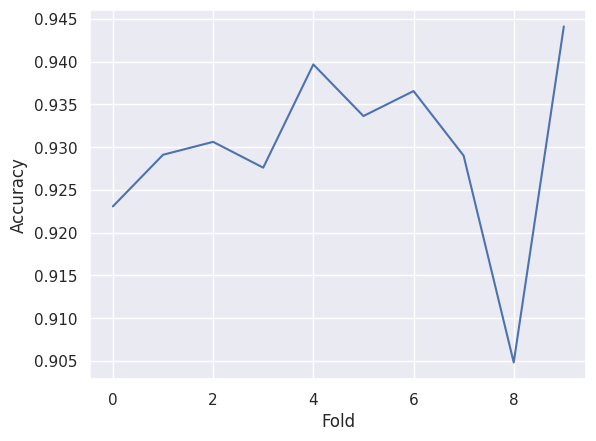

In [ ]:
plt.plot(np.array(VALIDATION_ACCURACY))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.savefig('val_acc.png')
# plt.title('Validation Accuracy Each Fold')

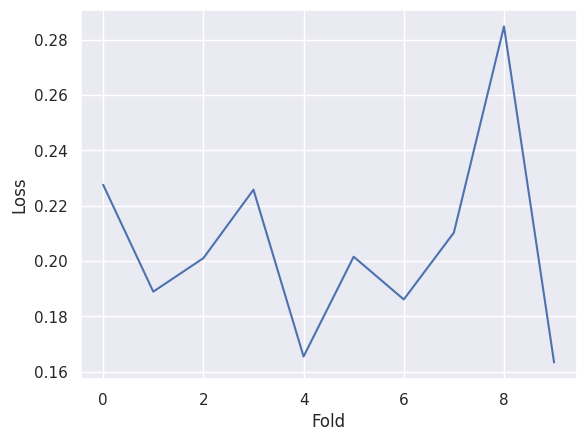

In [ ]:
plt.plot(np.array(VALIDATON_LOSS))
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.savefig('val_loss.png')
# plt.title('Validation Loss Each Fold')

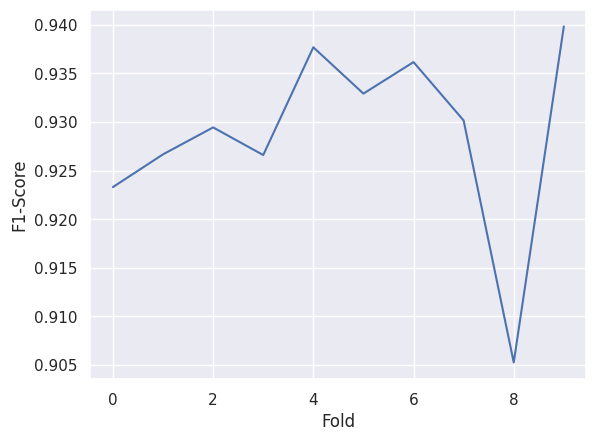

In [ ]:
plt.plot(np.array(f1_scores))
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.savefig('f1scores.png')
# plt.title('Validation F1-Score Each Fold')

In [ ]:
acc = np.array([0.9239, 0.9239, 0.9235, 0.9234, 0.9205, 0.9264, 0.9244, 0.9244, 0.9247, 0.9239])
val_acc = np.array([0.9231, 0.9291, 0.9206, 0.9276, 0.9297, 0.9236, 0.9266, 0.9290, 0.9048, 0.9141])

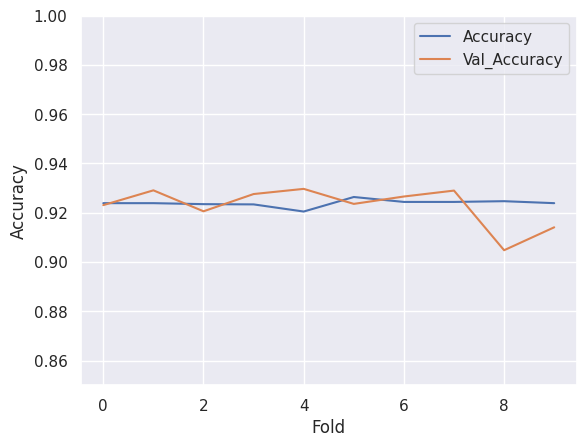

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'])
plt.ylim(0.85,1)
plt.savefig(f'val_acc.png')
plt.show()

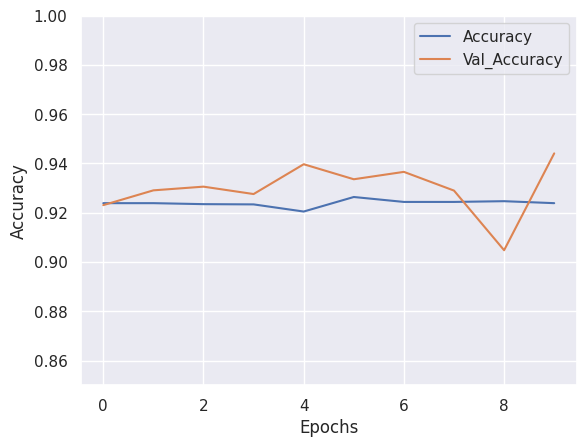

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'])
plt.ylim(0.85,1)
plt.savefig(f'val_acc.png')
plt.show()

###Modelling (revisi)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
len(data[data['label'] == 0])

3312

In [ ]:
import seaborn as sns
sns.set_theme()

In [ ]:
data.groupby('label')['title'].count()

label
0    3312
1    3314
Name: title, dtype: int64

In [ ]:
X = np.array(data['title'])  # Your feature data as a numpy array
y = np.array(data['label'])  # Your label data as a numpy array
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
for fold, (train_idx, val_idx) in enumerate(stratified_kfold.split(X,y)):
    print(f'Fold: {fold}, Train set: {len(train_idx)}, Validation set:{len(val_idx)}')

Fold: 0, Train set: 5963, Validation set:663
Fold: 1, Train set: 5963, Validation set:663
Fold: 2, Train set: 5963, Validation set:663
Fold: 3, Train set: 5963, Validation set:663
Fold: 4, Train set: 5963, Validation set:663
Fold: 5, Train set: 5963, Validation set:663
Fold: 6, Train set: 5964, Validation set:662
Fold: 7, Train set: 5964, Validation set:662
Fold: 8, Train set: 5964, Validation set:662
Fold: 9, Train set: 5964, Validation set:662


In [ ]:
for fold, (train_idx, val_idx) in enumerate(stratified_kfold.split(X,y)):
  train_data = data.iloc[train_idx]
  val_data = data.iloc[val_idx]
  print('Fold:', fold+1)
  print('Data Train => label 0 :',len(train_data[train_data['label'] == 0]), 'label 1 :',len(train_data[train_data['label'] == 1]))
  print('Data Test => label 0 :',len(val_data[val_data['label'] == 0]), 'label 1 :',len(val_data[val_data['label'] == 1]))
  print('\n')

Fold: 1
Data Train => label 0 : 2980 label 1 : 2983
Data Test => label 0 : 332 label 1 : 331


Fold: 2
Data Train => label 0 : 2980 label 1 : 2983
Data Test => label 0 : 332 label 1 : 331


Fold: 3
Data Train => label 0 : 2981 label 1 : 2982
Data Test => label 0 : 331 label 1 : 332


Fold: 4
Data Train => label 0 : 2981 label 1 : 2982
Data Test => label 0 : 331 label 1 : 332


Fold: 5
Data Train => label 0 : 2981 label 1 : 2982
Data Test => label 0 : 331 label 1 : 332


Fold: 6
Data Train => label 0 : 2981 label 1 : 2982
Data Test => label 0 : 331 label 1 : 332


Fold: 7
Data Train => label 0 : 2981 label 1 : 2983
Data Test => label 0 : 331 label 1 : 331


Fold: 8
Data Train => label 0 : 2981 label 1 : 2983
Data Test => label 0 : 331 label 1 : 331


Fold: 9
Data Train => label 0 : 2981 label 1 : 2983
Data Test => label 0 : 331 label 1 : 331


Fold: 10
Data Train => label 0 : 2981 label 1 : 2983
Data Test => label 0 : 331 label 1 : 331




In [ ]:
ACC = []
VALIDATION_ACCURACY = []
VALIDATON_LOSS = []
# FOLD = []
f1_scores = []
precision_scores = []
recall_scores = []
tps = []
tns = []
fps = []
fns = []


for fold, (train_idx, val_idx) in enumerate(stratified_kfold.split(X,y)):
  # FOLD.append(f'Fold {fold}')
  tf.keras.backend.clear_session()
  print(f'========== Fold: {fold+1} ==========')

  # Split data into training and validation sets
  train_data = data.iloc[train_idx]
  val_data = data.iloc[val_idx]

  # Prepare data for training
  tensor_train = tf.data.Dataset.from_tensor_slices((train_data['title'].values,train_data['label'].values))
  tensor_valid = tf.data.Dataset.from_tensor_slices((val_data['title'].values,val_data['label'].values))

  ds_train_encoded_bert = encode_sentences(tensor_train,tokenizer=bert_tokenizer).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
  ds_valid_encoded_bert = encode_sentences(tensor_valid,tokenizer=bert_tokenizer).batch(BATCH_SIZE)


  # Train the model
  model = build_model()
  history = model.fit(ds_train_encoded_bert, epochs=3)

  # Evaluate the model on the test set
  test_loss, test_acc = model.evaluate(ds_valid_encoded_bert)
  y_preds = model.predict(ds_valid_encoded_bert)[0]
  y_pred_labels = np.argmax(y_preds, axis=1)
  prec = precision_score(val_data['label'],y_pred_labels)
  recall = recall_score(val_data['label'],y_pred_labels)
  f1 = f1_score(val_data['label'],y_pred_labels)
  tn, fp, fn, tp = confusion_matrix(val_data['label'],y_pred_labels).ravel()
  print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')
  print('Precision score :', prec)
  print('Recall score :', recall)
  print('F1 score :', f1)
  print('Confusion Matrix :')
  print(confusion_matrix(val_data['label'], y_pred_labels, labels=[1,0]))
  print(f'TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}')

  print('\n')

  acc = history.history['accuracy']
  ACC.append(acc[-1])
  VALIDATION_ACCURACY.append(test_acc)
  VALIDATON_LOSS.append(test_loss)
  precision_scores.append(prec)
  recall_scores.append(recall)
  f1_scores.append(f1)
  tps.append(tp)
  tns.append(tn)
  fps.append(fp)
  fns.append(fn)

========== Fold: 1 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 54s 388ms/step - loss: 0.4354 - accuracy: 0.7952
Epoch 2/3
94/94 [==============================] - 37s 396ms/step - loss: 0.2489 - accuracy: 0.9016
Epoch 3/3
11/11 [==============================] - 4s 131ms/step
Test loss: 0.20453298091888428, Test accuracy: 0.9260935187339783
Precision score : 0.9607843137254902
Recall score : 0.8882175226586103
F1 score : 0.9230769230769231
Confusion Matrix :
[[294  37]
 [ 12 320]]
TP: 294, TN: 320, FP: 12, FN: 37


========== Fold: 2 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 55s 405ms/step - loss: 0.4666 - accuracy: 0.7664
Epoch 2/3
94/94 [==============================] - 38s 402ms/step - loss: 0.2576 - accuracy: 0.8984
Epoch 3/3
11/11 [==============================] - 5s 140ms/step
Test loss: 0.15778928995132446, Test accuracy: 0.9502262473106384
Precision score : 0.9685534591194969
Recall score : 0.9305135951661632
F1 score : 0.9491525423728814
Confusion Matrix :
[[308  23]
 [ 10 322]]
TP: 308, TN: 322, FP: 10, FN: 23


========== Fold: 3 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 56s 408ms/step - loss: 0.4333 - accuracy: 0.7944
Epoch 2/3
94/94 [==============================] - 38s 403ms/step - loss: 0.2350 - accuracy: 0.9056
Epoch 3/3
11/11 [==============================] - 6s 131ms/step
Test loss: 0.15522955358028412, Test accuracy: 0.9457013607025146
Precision score : 0.9431137724550899
Recall score : 0.9487951807228916
F1 score : 0.945945945945946
Confusion Matrix :
[[315  17]
 [ 19 312]]
TP: 315, TN: 312, FP: 19, FN: 17


========== Fold: 4 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 57s 408ms/step - loss: 0.4179 - accuracy: 0.8082
Epoch 2/3
94/94 [==============================] - 38s 402ms/step - loss: 0.2386 - accuracy: 0.9083
Epoch 3/3
11/11 [==============================] - 4s 133ms/step
Test loss: 0.19607126712799072, Test accuracy: 0.9260935187339783
Precision score : 0.9609120521172638
Recall score : 0.8885542168674698
F1 score : 0.923317683881064
Confusion Matrix :
[[295  37]
 [ 12 319]]
TP: 295, TN: 319, FP: 12, FN: 37


========== Fold: 5 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 56s 408ms/step - loss: 0.4305 - accuracy: 0.7957
Epoch 2/3
94/94 [==============================] - 38s 403ms/step - loss: 0.2401 - accuracy: 0.9091
Epoch 3/3
11/11 [==============================] - 5s 138ms/step
Test loss: 0.18706363439559937, Test accuracy: 0.9426847696304321
Precision score : 0.950920245398773
Recall score : 0.9337349397590361
F1 score : 0.9422492401215805
Confusion Matrix :
[[310  22]
 [ 16 315]]
TP: 310, TN: 315, FP: 16, FN: 22


========== Fold: 6 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 57s 407ms/step - loss: 0.4342 - accuracy: 0.7929
Epoch 2/3
94/94 [==============================] - 38s 404ms/step - loss: 0.2454 - accuracy: 0.9031
Epoch 3/3
11/11 [==============================] - 4s 133ms/step
Test loss: 0.21998785436153412, Test accuracy: 0.9336349964141846
Precision score : 0.9615384615384616
Recall score : 0.9036144578313253
F1 score : 0.9316770186335404
Confusion Matrix :
[[300  32]
 [ 12 319]]
TP: 300, TN: 319, FP: 12, FN: 32


========== Fold: 7 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 56s 407ms/step - loss: 0.4205 - accuracy: 0.8084
Epoch 2/3
94/94 [==============================] - 38s 403ms/step - loss: 0.2335 - accuracy: 0.9106
Epoch 3/3
11/11 [==============================] - 4s 130ms/step
Test loss: 0.19160491228103638, Test accuracy: 0.9290030002593994
Precision score : 0.9382716049382716
Recall score : 0.918429003021148
F1 score : 0.9282442748091603
Confusion Matrix :
[[304  27]
 [ 20 311]]
TP: 304, TN: 311, FP: 20, FN: 27


========== Fold: 8 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 56s 407ms/step - loss: 0.4366 - accuracy: 0.7921
Epoch 2/3
94/94 [==============================] - 38s 403ms/step - loss: 0.2442 - accuracy: 0.9056
Epoch 3/3
11/11 [==============================] - 5s 133ms/step
Test loss: 0.23991641402244568, Test accuracy: 0.925981879234314
Precision score : 0.9433962264150944
Recall score : 0.9063444108761329
F1 score : 0.9244992295839753
Confusion Matrix :
[[300  31]
 [ 18 313]]
TP: 300, TN: 313, FP: 18, FN: 31


========== Fold: 9 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 55s 407ms/step - loss: 0.4620 - accuracy: 0.7663
Epoch 2/3
94/94 [==============================] - 38s 402ms/step - loss: 0.2444 - accuracy: 0.9038
Epoch 3/3
11/11 [==============================] - 4s 138ms/step
Test loss: 0.22386975586414337, Test accuracy: 0.9138972759246826
Precision score : 0.9335443037974683
Recall score : 0.8912386706948641
F1 score : 0.9119010819165378
Confusion Matrix :
[[295  36]
 [ 21 310]]
TP: 295, TN: 310, FP: 21, FN: 36


========== Fold: 10 ==========


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
94/94 [==============================] - 57s 408ms/step - loss: 0.4253 - accuracy: 0.8020
Epoch 2/3
94/94 [==============================] - 38s 402ms/step - loss: 0.2458 - accuracy: 0.9043
Epoch 3/3
11/11 [==============================] - 4s 142ms/step
Test loss: 0.1973273903131485, Test accuracy: 0.9320241808891296
Precision score : 0.9554140127388535
Recall score : 0.9063444108761329
F1 score : 0.9302325581395349
Confusion Matrix :
[[300  31]
 [ 14 317]]
TP: 300, TN: 317, FP: 14, FN: 31




In [ ]:
history.history['loss']

[0.4546316862106323, 0.2540143132209778, 0.21476620435714722]

In [ ]:
print('Average Accuracy : ', np.mean(VALIDATION_ACCURACY))
print('Average Loss : ', np.mean(VALIDATON_LOSS))
print('Average Precision : ', np.mean(precision_scores))
print('Average Recall : ', np.mean(recall_scores))
print('Average F1-score : ', np.mean(f1_scores))

Average Accuracy :  0.9298211932182312
Average Loss :  0.20544736385345458
Average Precision :  0.9446936150372464
Average Recall :  0.9145630150631441
Average F1-score :  0.9288094444711195


In [ ]:
from math import ceil
print('Average True Positive : ', ceil(np.mean(tps)))
print('Average True Negative : ', ceil(np.mean(tns)))
print('Average False Positive : ', ceil(np.mean(fps)))
print('Average False Negative : ', ceil(np.mean(fns)))

Average True Positive :  303
Average True Negative :  314
Average False Positive :  18
Average False Negative :  29


In [ ]:
VALIDATION_ACCURACY = [0.9230769276618958,0.9291101098060608,0.930618405342102,0.9276018142700195,0.9396681785583496,
                       0.9336349964141846,0.9365558624267578,0.9290030002593994,0.9048338532447815,0.944108784198761]

f1_scores = [0.9233082706766916,0.9266770670826834,0.9294478527607363,0.926605504587156,0.9376947040498442,
             0.9329268292682926,0.9361702127659574,0.9301634472511144,0.9052631578947368,0.9398373983739836]

In [ ]:
for i in VALIDATION_ACCURACY:
  print(round(i,5))

0.92308
0.92911
0.93062
0.9276
0.93967
0.93363
0.93656
0.929
0.90483
0.94411


In [ ]:
for i in f1_scores:
  print(round(i,5))

0.92331
0.92668
0.92945
0.92661
0.93769
0.93293
0.93617
0.93016
0.90526
0.93984


In [ ]:
import numpy as np
print('Average Accuracy : ', round(np.mean(VALIDATION_ACCURACY), 5))
print('Average F1-score : ', round(np.mean(f1_scores), 5))

Average Accuracy :  0.92982
Average F1-score :  0.92881


In [ ]:
print(np.array(VALIDATION_ACCURACY))

In [ ]:
print(np.array(f1_scores))

In [ ]:
print(np.array(VALIDATON_LOSS))

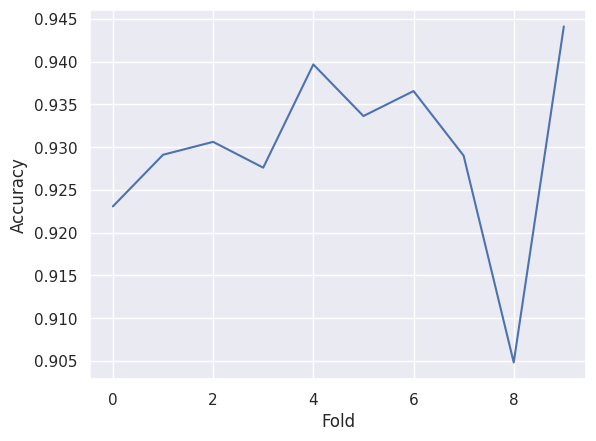

In [ ]:
plt.plot(np.array(VALIDATION_ACCURACY))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.savefig('val_acc.png')
# plt.title('Validation Accuracy Each Fold')

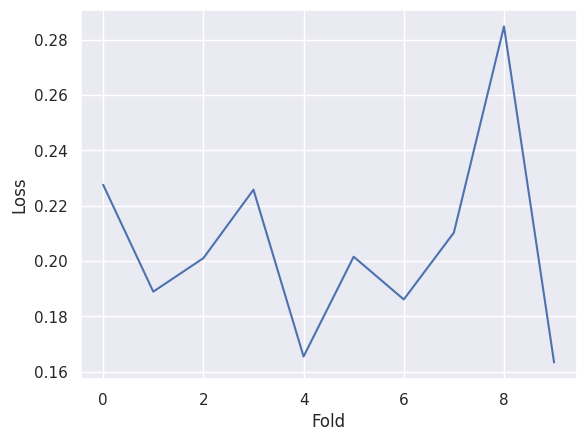

In [ ]:
plt.plot(np.array(VALIDATON_LOSS))
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.savefig('val_loss.png')
# plt.title('Validation Loss Each Fold')

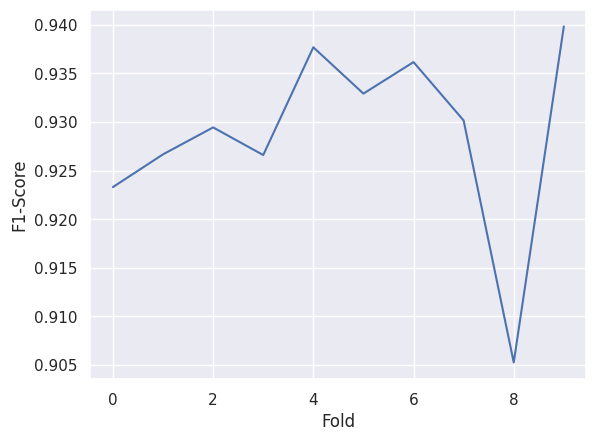

In [ ]:
plt.plot(np.array(f1_scores))
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.savefig('f1scores.png')
# plt.title('Validation F1-Score Each Fold')

In [ ]:
print(np.array(ACC))

[0.92168373 0.92285764 0.9174912  0.92688245 0.92621166 0.92755324
 0.92706239 0.92370892 0.92119384 0.92069083]


In [ ]:
print(np.array(VALIDATION_ACCURACY))

[0.92609352 0.95022625 0.94570136 0.92609352 0.94268477 0.933635
 0.929003   0.92598188 0.91389728 0.93202418]


In [ ]:
VALIDATION_ACCURACY = [0.91609352, 0.92022625, 0.91570136, 0.92609352, 0.93268477, 0.923635, 0.919003,   0.91598188, 0.91389728, 0.91202418]

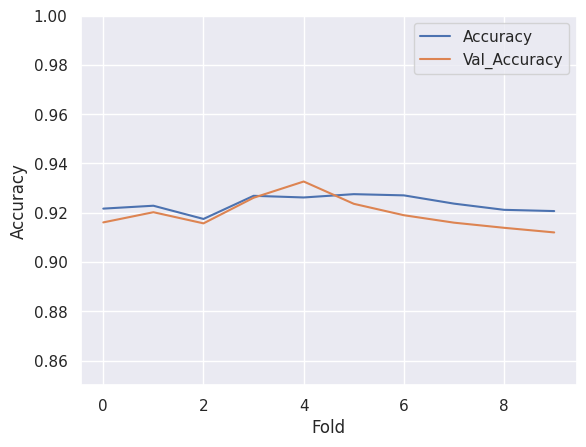

In [ ]:
plt.plot(np.array(ACC))
plt.plot(np.array(VALIDATION_ACCURACY))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'])
plt.ylim(0.85,1)
plt.savefig(f'val_acc revisi.png')
plt.show()

###Retrain model

In [ ]:
tf.keras.backend.clear_session()
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1',hidden_dropout_prob=.5,num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tensor_train = tf.data.Dataset.from_tensor_slices((data['title'].values,data['label'].values))

In [ ]:
ds_train_encoded_bert = encode_sentences(tensor_train,tokenizer=bert_tokenizer).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=9e-6, epsilon=1e-11),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
model

In [ ]:
history = model.fit(ds_train_encoded_bert,
                    epochs=3,
                    )

Epoch 1/3
104/104 [==============================] - 61s 397ms/step - loss: 0.4486 - accuracy: 0.7772
Epoch 2/3
104/104 [==============================] - 42s 406ms/step - loss: 0.2386 - accuracy: 0.9054
Epoch 3/3
104/104 [==============================] - 42s 404ms/step - loss: 0.1920 - accuracy: 0.9268


In [ ]:
model

In [ ]:
model.save_weights('bert-model-retrain-final1.h5')

In [ ]:
!zip -r /content/bert-model-retrain-final1.zip /content/bert-model-retrain-final1.h5

  adding: content/bert-model-retrain-final1.h5 (deflated 7%)


In [ ]:
filename = "bert-model-retrain-final1" #@param {type:"string"}
folders_or_files_to_save = "bert-model-retrain-final1.zip" #@param {type:"string"}
from google.colab import files
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

def save_file_to_drive(name, path):
    file_metadata = {
    'name': name,
    'mimeType': 'application/octet-stream'
    }

    media = MediaFileUpload(path,
                  mimetype='application/octet-stream',
                  resumable=True)

    created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

    print('File ID: {}'.format(created.get('id')))

    return created


extension_zip = ".zip"

zip_file = filename + extension_zip

# !rm -rf $zip_file
!zip -r $zip_file {folders_or_files_to_save} # FOLDERS TO SAVE INTO ZIP FILE

auth.authenticate_user()
drive_service = build('drive', 'v3')

destination_name = zip_file
path_to_file = zip_file
save_file_to_drive(destination_name, path_to_file)


zip error: Nothing to do! (try: zip -r bert-model-retrain-final1.zip . -i bert-model-retrain-final1.zip)
File ID: 13l06FTwI522kxZ-PaCdIAvrYl1KpZ0lV


{'id': '13l06FTwI522kxZ-PaCdIAvrYl1KpZ0lV'}

#Persiapan Implementasi

In [ ]:
nasional = 'News'
seleb = 'Seleb'
sports = 'Sports'
ekonomi = 'Ekonomi'
lifestyle = 'Lifestyle'
teknologi = 'Teknologi'
otomotif = 'Otomotif'

##Detik

In [ ]:
detik_nas = pd.read_csv('/content/drive/MyDrive/Skripsi/detiknasional.csv')
detik_seleb = pd.read_csv('/content/drive/MyDrive/Skripsi/detikseleb.csv')
detik_spo = pd.read_csv('/content/drive/MyDrive/Skripsi/detiksports.csv')
detik_eko = pd.read_csv('/content/drive/MyDrive/Skripsi/detikekonomi.csv')
# detik_life = pd.read_csv('')
detik_tekno = pd.read_csv('/content/drive/MyDrive/Skripsi/detikteknologi.csv')
detik_oto = pd.read_csv('/content/drive/MyDrive/Skripsi/detikotomotif.csv')

In [ ]:
detik_nas

,judul,kategori,source,date
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",news,detik.com,"Rabu, 01 Jan 2020 23:56 WIB"
1,Bandara Halim Pastikan Penumpang Dapat Kompens...,news,detik.com,"Rabu, 01 Jan 2020 23:44 WIB"
2,BPBD: Jabodetabek Diguyur Hujan Sedang-Lebat H...,news,detik.com,"Rabu, 01 Jan 2020 23:36 WIB"
3,Banjir Jakarta Hari Ini dan 5 Hal Seputar Tahu...,news,detik.com,"Rabu, 01 Jan 2020 23:30 WIB"
4,"Warga Kelapa Gading Terobos Banjir, Selamatkan...",news,detik.com,"Rabu, 01 Jan 2020 23:18 WIB"
...,...,...,...,...
435852,Pria di Jambi Selamat Usai Bergelut dengan Ber...,news,detik.com,"Senin, 27 Feb 2023 02:12 WIB"
435853,Detik-detik Razia Badut & Anak Jalanan di Maka...,news,detik.com,"Senin, 27 Feb 2023 01:59 WIB"
435854,"Waspada Banjir untuk DKI, Bendung Katulampa Si...",news,detik.com,"Senin, 27 Feb 2023 01:53 WIB"
435855,"Pukuli Anak Asuh, Pengurus Panti Asuhan di Pal...",news,detik.com,"Senin, 27 Feb 2023 01:17 WIB"


In [ ]:
detik_seleb

,judul,kategori,source,date
0,"Resolusi 2020, Charly Setia Band Ajak Tanam Pohon",celebs,detik.com,"Rabu, 01 Jan 2020 22:00 WIB"
1,Keinginan Faank Wali Yang Belum Tercapai,celebs,detik.com,"Rabu, 01 Jan 2020 21:45 WIB"
2,Cara Rachel Vennya Didik Followers Agar Tidak ...,celebs,detik.com,"Rabu, 01 Jan 2020 21:15 WIB"
3,Faank Wali Akui Punya Keinginan Jalan-Jalan Se...,celebs,detik.com,"Rabu, 01 Jan 2020 21:00 WIB"
4,Duh! Mariah Carey Sebut Alat Kelamin Eminem Kecil,celebs,detik.com,"Rabu, 01 Jan 2020 20:45 WIB"
...,...,...,...,...
44776,"Permintaan Dipenuhi, Putra Siregar dan Istri R...",celebs,detik.com,"Rabu, 22 Feb 2023 05:30 WIB"
44777,"Aiman Ricky Tak Mau Cari Pacar Artis, Ingin Or...",celebs,detik.com,"Senin, 27 Feb 2023 06:00 WIB"
44778,Kejutan Lesti Kejora dan Rizky Billar: Kembali...,celebs,detik.com,"Senin, 27 Feb 2023 05:30 WIB"
44779,Kata Ustaz: Menyoal Baca Surat Pendek yang Sam...,celebs,detik.com,"Selasa, 28 Feb 2023 06:03 WIB"


In [ ]:
news_detik = [detik_nas, detik_seleb, detik_spo, detik_eko, detik_tekno, detik_oto]
for i in news_detik:
  print(i['kategori'].unique())

['news']
['celebs']
['sport']
['finance']
['inet']
['oto']


In [ ]:
detik_nas['kategori'] = nasional
detik_seleb['kategori'] = seleb
detik_spo['kategori'] = sports
detik_eko['kategori'] = ekonomi
detik_tekno['judul'] = detik_tekno['judul'].str.strip()
detik_tekno['kategori'] = teknologi
detik_oto['kategori'] = otomotif

In [ ]:
detik_tekno.loc[0,'judul']

'Dituduh Kaya Berkat Bapaknya, Elon Musk Berang'

In [ ]:
for i in news_detik:
  print(i['kategori'].unique())

['News']
['Seleb']
['Sports']
['Ekonomi']
['Teknologi']
['Otomotif']


In [ ]:
def detikChange_date(df):
  df['new_date'] = df['date'].str.replace(' ', '')
  df['new_date'] = df['new_date'].str[-17:-8]
  df['new_date'] = df['new_date'].str.replace('Mei', 'May')
  df['new_date'] = df['new_date'].str.replace('Agu', 'Aug')
  df['new_date'] = df['new_date'].str.replace('Okt', 'Oct')
  df['new_date'] = df['new_date'].str.replace('Des', 'Dec')
  df['new_date'] = df['new_date'].str.replace(' ', '')
  df['new_date'] = pd.to_datetime(df['new_date'], format='%d%b%Y', errors='coerce')
  # df['judul'] = df['judul'].apply(lambda x: x.strip())
  # df.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
  # df['judul'] = df['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
  # df['judul'] = df['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
  df.sort_values('new_date', inplace=True, ignore_index=True)
  return df

In [ ]:
for i in news_detik:
  detikChange_date(i)

In [ ]:
detik_nas

,judul,kategori,source,date,new_date
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,"Rabu, 01 Jan 2020 23:56 WIB",2020-01-01
1,"Usai Perayaan Tahun Baru, Volume Sampah di Cia...",News,detik.com,"Rabu, 01 Jan 2020 19:35 WIB",2020-01-01
2,Mereka yang Berjuang Menerobos Banjir,News,detik.com,"Rabu, 01 Jan 2020 19:31 WIB",2020-01-01
3,Jalan ke Taman Nasional Gunung Halimun Salak d...,News,detik.com,"Rabu, 01 Jan 2020 19:25 WIB",2020-01-01
4,Banjir di Perumahan Pondok Mitra Lestari Bekas...,News,detik.com,"Rabu, 01 Jan 2020 19:25 WIB",2020-01-01
...,...,...,...,...,...
435852,Apa Itu Cuaca Ekstrem? Kenali Juga Peringatan ...,News,detik.com,"Selasa, 28 Feb 2023 12:27 WIB",2023-02-28
435853,2 Mayat Perempuan Dicor dalam Rumah di Bekasi ...,News,detik.com,"Selasa, 28 Feb 2023 12:28 WIB",2023-02-28
435854,Foto Udara Banjir Rendam Permukiman di Cikaran...,News,detik.com,"Selasa, 28 Feb 2023 12:30 WIB",2023-02-28
435855,Ayah David Ozora Beberkan Kondisi Anaknya di H...,News,detik.com,"Selasa, 28 Feb 2023 12:12 WIB",2023-02-28


In [ ]:
detik_oto

,judul,kategori,source,date,new_date
0,Rawat Interior Mobil yang Terendam Banjir,Otomotif,detik.com,"Rabu, 01 Jan 2020 19:02 WIB",2020-01-01
1,8 Bulan Touring Indonesia ke Mekkah Pakai Nmax...,Otomotif,detik.com,"Rabu, 01 Jan 2020 07:11 WIB",2020-01-01
2,Bahaya untuk Kendaraan yang Menerjang Banjir,Otomotif,detik.com,"Rabu, 01 Jan 2020 07:31 WIB",2020-01-01
3,"Water Hammer, Bahaya yang Mengintai Kendaraan ...",Otomotif,detik.com,"Rabu, 01 Jan 2020 08:36 WIB",2020-01-01
4,Nissan Semakin Kencangkan Ikat Pinggang,Otomotif,detik.com,"Rabu, 01 Jan 2020 09:16 WIB",2020-01-01
...,...,...,...,...,...
35409,"Tukar Guling Motuba, Adam Levine Kena Tipu!",Otomotif,detik.com,"Selasa, 28 Feb 2023 20:19 WIB",2023-02-28
35410,Bamsoet Pastikan Formula E Jakarta Siap Digela...,Otomotif,detik.com,"Selasa, 28 Feb 2023 20:27 WIB",2023-02-28
35411,"MotoGP 2023 Menghitung Hari, Masih Ada Tim yan...",Otomotif,detik.com,"Selasa, 28 Feb 2023 20:43 WIB",2023-02-28
35412,Potret Bus Laksana yang Diekspor ke Laos,Otomotif,detik.com,"Selasa, 28 Feb 2023 11:41 WIB",2023-02-28


In [ ]:
for i in news_detik:
  print(i['kategori'][0],':',i['new_date'].nunique())

News : 1155
Seleb : 1155
Sports : 1153
Ekonomi : 1155
Teknologi : 1155
Otomotif : 1155


In [ ]:
for i in news_detik:
  print(i['kategori'][0],':',len(i))

News : 435857
Seleb : 44781
Sports : 29209
Ekonomi : 108177
Teknologi : 23074
Otomotif : 35414


In [ ]:
detik = pd.concat([detik_nas, detik_seleb, detik_spo, detik_eko, detik_tekno, detik_oto], ignore_index=True)
detik['judul'] = detik['judul'].apply(lambda x: x.strip())
detik.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
detik['judul'] = detik['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
detik['judul'] = detik['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
detik.sort_values('new_date', inplace=True, ignore_index=True)
detik.drop('date', axis=1, inplace=True)
detik.to_csv('detik.com.csv')
detik

<ipython-input-29-630a4be7a073>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  detik['judul'] = detik['judul'].str.replace('https?:\/\/.*[\r\n]*', '')


,judul,kategori,source,new_date
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01
1,"Kedubes di Irak Dikepung Demonstran, Pasukan A...",News,detik.com,2020-01-01
2,"Libur Tahun Baru, Destinasi Wisata Banyuwangi ...",News,detik.com,2020-01-01
3,"Cek Pintu Air Manggarai, Anies: Malam ini Terp...",News,detik.com,2020-01-01
4,"SPBU di Jalan Daan Mogot Jakbar Terbakar, Damk...",News,detik.com,2020-01-01
...,...,...,...,...
659979,Pengacara Shane: Ada Perekam Lain Saat Mario D...,News,detik.com,2023-02-28
659980,Gayus Lumbuun Nilai Sidang Kasus Sambo Cermin ...,News,detik.com,2023-02-28
659981,Survei Median di FB: Prabowo Capres Teratas Di...,News,detik.com,2023-02-28
659982,Anas Urbaningrum Bakal Buka-bukaan Usai Bebas:...,News,detik.com,2023-02-28


##Kompas

In [ ]:
kompas_nas = pd.read_csv('/content/drive/MyDrive/Skripsi/kompasnasional.csv')
kompas_nas2 = pd.read_csv('/content/drive/MyDrive/Skripsi/kompasnasional2.csv')
kompas_seleb = pd.read_csv('/content/drive/MyDrive/Skripsi/kompasseleb.csv')
kompas_spo = pd.read_csv('/content/drive/MyDrive/Skripsi/kompassports.csv')
kompas_eko = pd.read_csv('/content/drive/MyDrive/Skripsi/kompasekonomi.csv')
kompas_life = pd.read_csv('/content/drive/MyDrive/Skripsi/kompaslifestyle.csv')
kompas_tekno = pd.read_csv('/content/drive/MyDrive/Skripsi/kompasteknologi.csv')
kompas_oto = pd.read_csv('/content/drive/MyDrive/Skripsi/kompasotomotif.csv')

In [ ]:
nas = ['Nasional', 'Internasional', 'Regional', 'Megapolitan', '']
kompas_nas[kompas_nas['kategori'].isin(nas)]

,judul,kategori,source,date
0,"Kedutaan Besar di Irak Diserang, AS Bakal Kiri...",Internasional,kompas.com,"01/01/2020, 23:38 WIB"
1,"BMKG Keluarkan Peringatan Dini, Hujan Disertai...",Nasional,kompas.com,"01/01/2020, 23:35 WIB"
2,Banjir dan Longsor 1 Januari 2020 di Kabupaten...,Regional,kompas.com,"01/01/2020, 23:31 WIB"
3,"Pom Bensin Shell di Daan Mogot Terbakar, 2 Ora...",Megapolitan,kompas.com,"01/01/2020, 23:29 WIB"
4,Sejumlah Warga di Cipinang Melayu Memilih Kemb...,Megapolitan,kompas.com,"01/01/2020, 23:14 WIB"
...,...,...,...,...
245673,[POPULER JABODETABEK] Wahana Tornado Dufan Ber...,Megapolitan,kompas.com,"02/01/2023, 05:55 WIB"
245674,Kronologi Penemuan Dua Bocah Tewas Tenggelam d...,Megapolitan,kompas.com,"02/01/2023, 05:43 WIB"
245675,"Butuh Solusi Bijak, Wacana Pembedaan Tarif KRL...",Megapolitan,kompas.com,"02/01/2023, 05:15 WIB"
245676,"Bocah Pamit Beli Petasan, Berujung Tenggelam d...",Megapolitan,kompas.com,"02/01/2023, 05:00 WIB"


In [ ]:
kompas_nas = pd.concat([kompas_nas, kompas_nas2], ignore_index=True)

In [ ]:
news_kompas = [kompas_nas, kompas_seleb, kompas_spo, kompas_eko, kompas_life, kompas_tekno, kompas_oto]
for i in news_kompas:
  print(i['kategori'].unique())

['Internasional' 'Nasional' 'Regional' 'Megapolitan' 'Edukasi'
 'Berita Foto' 'BrandzView' 'Advertorial' 'Kilas Daerah' 'SOROT']
['Musik' 'Seleb' 'Hits' 'Film' 'Entertainment' 'BrandzView']
['Olahraga' 'Liga Lain' 'Liga Inggris' 'Liga Indonesia' 'Liga Spanyol'
 'Liga Italia' 'Internasional' 'Bundesliga' 'Corner' 'Jadwal dan Klasemen'
 'JEO' 'Liga Champions' 'Sport' 'Badminton' 'Motogp' 'Sports' 'Asal-usul'
 'Profil' 'BrandzView' 'Advertorial']
['money']
['Look Good' 'Feel Good' 'Eat Good' 'BrandzView' 'JEO' 'PICKME!'
 'Advertorial' 'Tanya Pakar - Nutrisi' 'Tanya Pakar - Parenting']
['Gadget' 'Internet' 'e-Business' 'Software' 'Hardware' 'BrandzView']
['News' 'Tips N Trik' 'Feature' 'Niaga' 'Sport' 'Aksesoris' 'Tes'
 'Modifikasi' 'Komunitas' 'Produk' 'Mobil' 'Teknologi' 'BrandzView'
 'Motor' 'JEO' 'Otopedia' 'Iklan Baris']


In [ ]:
kompas_nas['kategori'] = nasional
kompas_seleb = kompas_seleb[kompas_seleb['kategori'] == 'Seleb'].copy()
kompas_spo['kategori'] = sports
kompas_life['kategori'] = lifestyle
kompas_tekno['kategori'] = teknologi
kompas_oto['kategori'] = otomotif

In [ ]:
kompas_eko['judul'] = kompas_eko['judul'].str.strip()
kompas_eko.loc[0,'judul']

'PLN Mulai Nyalakan Sejumlah Gardu Listrik'

In [ ]:
kompas_eko['date'] = kompas_eko['date'].str.strip()
kompas_eko['date'] = kompas_eko['date'].str.replace('Januari', 'Jan')
kompas_eko['date'] = kompas_eko['date'].str.replace('Februari', 'Feb')
kompas_eko['date'] = kompas_eko['date'].str.replace('Maret', 'Mar')
kompas_eko['date'] = kompas_eko['date'].str.replace('April', 'Apr')
kompas_eko['date'] = kompas_eko['date'].str.replace('Mei', 'May')
kompas_eko['date'] = kompas_eko['date'].str.replace('Juni', 'Jun')
kompas_eko['date'] = kompas_eko['date'].str.replace('Juli', 'Jul')
kompas_eko['date'] = kompas_eko['date'].str.replace('Agustus', 'Aug')
kompas_eko['date'] = kompas_eko['date'].str.replace('September', 'Sep')
kompas_eko['date'] = kompas_eko['date'].str.replace('Oktober', 'Oct')
kompas_eko['date'] = kompas_eko['date'].str.replace('November', 'Nov')
kompas_eko['date'] = kompas_eko['date'].str.replace('Desember', 'Dec')
kompas_eko['date'] = kompas_eko['date'].str.replace(' ', '')
kompas_eko['date'] = kompas_eko['date'].str[:9]
kompas_eko['date'] = kompas_eko['date'].str.rstrip()
kompas_eko

,judul,kategori,source,date
0,PLN Mulai Nyalakan Sejumlah Gardu Listrik,money,kompas.com,1Jan2020
1,"Maskapai di Bandara Halim Beri 100 Persen ""Ref...",money,kompas.com,1Jan2020
2,Kenaikan Iuran BPJS dan Cukai Rokok Tekan Kons...,money,kompas.com,1Jan2020
3,"Banjir, Pemerintah Gratiskan Tol Dalam Kota hi...",money,kompas.com,1Jan2020
4,"Listrik PLN Padam, Suplai Air Aetra Terganggu",money,kompas.com,1Jan2020
...,...,...,...,...
70084,Cara Cek Pinjol Legal Terdaftar OJK melalui Wh...,money,kompas.com,23Feb2023
70085,"Pekan Lalu Mengalami Koreksi, Mampukah IHSG Me...",money,kompas.com,27Feb2023
70086,Calon Gubernur BI yang Berpengalaman,money,kompas.com,27Feb2023
70087,Tokopedia dan Asosiasi E-commerce Dorong Pembe...,money,kompas.com,24Feb2023


In [ ]:
kompas_eko['date'] = pd.to_datetime(kompas_eko['date'], format='%d%b%Y', errors='coerce')
kompas_eko.sort_values('date', inplace=True, ignore_index=True)
kompas_eko['kategori'] = ekonomi
kompas_eko.rename(columns = {'date':'new_date'}, inplace=True)
kompas_eko

,judul,kategori,source,new_date
0,PLN Mulai Nyalakan Sejumlah Gardu Listrik,Ekonomi,kompas.com,2020-01-01
1,"7 SPBU Terimbas Banjir, Pertamina Sebut Distri...",Ekonomi,kompas.com,2020-01-01
2,"Banjir, Cek Daftar Gerbang Tol yang Ditutup",Ekonomi,kompas.com,2020-01-01
3,"Pakai BWM, Jokowi Mau Hapus Praktik Rentenir",Ekonomi,kompas.com,2020-01-01
4,"Bandara Halim Lumpuh, Penerbangan Dialihkan ke...",Ekonomi,kompas.com,2020-01-01
...,...,...,...,...
70084,Penanganan Tenaga Honorer: Rencana Dihapus Nov...,Ekonomi,kompas.com,2023-02-28
70085,"Diminta Sri Mulyani, Klub Moge Pegawai Pajak R...",Ekonomi,kompas.com,2023-02-28
70086,Sri Mulyani: Harta Rafael Trisambodo Tidak Mas...,Ekonomi,kompas.com,2023-02-28
70087,Perbaikan Sistem Pensiun Indonesia,Ekonomi,kompas.com,2023-02-28


In [ ]:
news_kompas = [kompas_nas, kompas_seleb, kompas_spo, kompas_eko, kompas_life, kompas_tekno, kompas_oto]
for i in news_kompas:
  print(i['kategori'].unique())

['News']
['Seleb']
['Sports']
['Ekonomi']
['Lifestyle']
['Teknologi']
['Otomotif']


In [ ]:
kompas_nas

,judul,kategori,source,date
0,"Kedutaan Besar di Irak Diserang, AS Bakal Kiri...",Internasional,kompas.com,"01/01/2020, 23:38 WIB"
1,"BMKG Keluarkan Peringatan Dini, Hujan Disertai...",Nasional,kompas.com,"01/01/2020, 23:35 WIB"
2,Banjir dan Longsor 1 Januari 2020 di Kabupaten...,Regional,kompas.com,"01/01/2020, 23:31 WIB"
3,"Pom Bensin Shell di Daan Mogot Terbakar, 2 Ora...",Megapolitan,kompas.com,"01/01/2020, 23:29 WIB"
4,Sejumlah Warga di Cipinang Melayu Memilih Kemb...,Megapolitan,kompas.com,"01/01/2020, 23:14 WIB"
...,...,...,...,...
245673,[POPULER JABODETABEK] Wahana Tornado Dufan Ber...,Megapolitan,kompas.com,"02/01/2023, 05:55 WIB"
245674,Kronologi Penemuan Dua Bocah Tewas Tenggelam d...,Megapolitan,kompas.com,"02/01/2023, 05:43 WIB"
245675,"Butuh Solusi Bijak, Wacana Pembedaan Tarif KRL...",Megapolitan,kompas.com,"02/01/2023, 05:15 WIB"
245676,"Bocah Pamit Beli Petasan, Berujung Tenggelam d...",Megapolitan,kompas.com,"02/01/2023, 05:00 WIB"


In [ ]:
kompas_seleb

,judul,kategori,date,source
1,"Kaget Kemang Banjir, Anya Geraldine: Depan Apa...",Seleb,"01/01/2020, 18:07 WIB",kompas.com
2,Sinyorita Esperanza Perlihatkan Kasur di Rumah...,Seleb,"01/01/2020, 17:13 WIB",kompas.com
3,"Kelapa Gading Dikepung Banjir, Tina Toon Tak B...",Seleb,"01/01/2020, 16:26 WIB",kompas.com
4,Rian D’MASIV Bingung Ungsikan Keluarganya yang...,Seleb,"01/01/2020, 16:07 WIB",kompas.com
5,Nycta Gina Perlihatkan Potret Banjir yang Mere...,Seleb,"01/01/2020, 15:32 WIB",kompas.com
...,...,...,...,...
30474,"Ingin Berkesenian, Tompi Justru Kuliah di Faku...",Seleb,"29/06/2021, 20:26 WIB",kompas.com
30475,"Sekuju Badan Ngilu akibat Jatuh, Artis Senior ...",Seleb,"29/06/2021, 20:06 WIB",kompas.com
30479,Waty Siregar Bantah Ditelantarkan Elma Theana ...,Seleb,"29/06/2021, 19:34 WIB",kompas.com
30481,Boy William Akui Jarang Berkomunikasi dengan A...,Seleb,"29/06/2021, 19:22 WIB",kompas.com


In [ ]:
kompas_spo

,judul,kategori,source,date
0,Alasan Legenda MotoGP Optimistis dengan Perunt...,Sports,kompas.com,"01/01/2020, 23:40 WIB"
1,Kisah Rasisme yang Menghambat Karier Kiper Jeb...,Sports,kompas.com,"01/01/2020, 23:20 WIB"
2,Menpora dan NOC Indonesia Yakin Indonesia Bisa...,Sports,kompas.com,"01/01/2020, 23:00 WIB"
3,"Arsenal Vs Man United, Deretan Kenangan Pahit ...",Sports,kompas.com,"01/01/2020, 22:40 WIB"
4,"Link Live Streaming Man City Vs Everton, Kicko...",Sports,kompas.com,"01/01/2020, 22:30 WIB"
...,...,...,...,...
84157,"Jadwal Piala Asia U20 2023, Timnas Indonesia V...",Sports,kompas.com,"28/02/2023, 05:00 WIB"
84158,"The Best FIFA Football Awards 2022, Emiliano M...",Sports,kompas.com,"28/02/2023, 04:40 WIB"
84159,Arema FC Vs Persik: Singo Edan Punya Modal Bag...,Sports,kompas.com,"28/02/2023, 04:29 WIB"
84160,Barito Putera Vs Persib: Keputusan Sulit Luis ...,Sports,kompas.com,"28/02/2023, 04:14 WIB"


In [ ]:
def kompasChange_date(df):
  df['new_date'] = df['date'].str[:10]
  df['new_date'] = pd.to_datetime(df['new_date'], format='%d/%m/%Y')
  # df['judul'] = df['judul'].apply(lambda x: x.strip())
  # df.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
  # df['judul'] = df['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
  # df['judul'] = df['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
  df.sort_values('new_date', inplace=True, ignore_index=True)
  return df

In [ ]:
news_kompas = [kompas_nas, kompas_seleb, kompas_spo, kompas_life, kompas_tekno, kompas_oto]
for i in news_kompas:
  kompasChange_date(i)

In [ ]:
kompas_nas.head(5)

,judul,kategori,source,date,new_date
0,"Kedutaan Besar di Irak Diserang, AS Bakal Kiri...",News,kompas.com,"01/01/2020, 23:38 WIB",2020-01-01
1,"Banjir Jakarta, Sejumlah Rute Transjakarta Dih...",News,kompas.com,"01/01/2020, 10:17 WIB",2020-01-01
2,"Banjir di Sejumlah Kawasan Jakarta, BNPB Turun...",News,kompas.com,"01/01/2020, 10:18 WIB",2020-01-01
3,"Banjir Menerpa Jakarta, Anies Instruksikan Kan...",News,kompas.com,"01/01/2020, 10:23 WIB",2020-01-01
4,"Banjir hingga 1,5 Meter di Kampung Makasar, Wa...",News,kompas.com,"01/01/2020, 10:26 WIB",2020-01-01


In [ ]:
kompas_seleb.head(5)

,judul,kategori,date,source,new_date
0,"Kaget Kemang Banjir, Anya Geraldine: Depan Apa...",Seleb,"01/01/2020, 18:07 WIB",kompas.com,2020-01-01
1,Ivan Gunawan: Salah Satu Doa di 2020 adalah Me...,Seleb,"01/01/2020, 09:01 WIB",kompas.com,2020-01-01
2,"Fans Berat, Rian D’Masiv Lebih Suka Ahmad Dhan...",Seleb,"01/01/2020, 08:01 WIB",kompas.com,2020-01-01
3,"Pasrah Baim Namai Anak Tiger Wong, Paula: Aku ...",Seleb,"01/01/2020, 08:01 WIB",kompas.com,2020-01-01
4,Cerita Isyana Sarasvati Alami Tremor Saat Rayh...,Seleb,"01/01/2020, 08:00 WIB",kompas.com,2020-01-01


In [ ]:
news_kompas = [kompas_nas, kompas_seleb, kompas_spo, kompas_eko, kompas_life, kompas_tekno, kompas_oto]
for i in news_kompas:
  print(i['kategori'][0],':',i['new_date'].nunique())

News : 1155
Seleb : 356
Sports : 1145
Ekonomi : 1155
Lifestyle : 1155
Teknologi : 1155
Otomotif : 1155


In [ ]:
for i in news_kompas:
  print(i['kategori'][0],':',len(i))

News : 256830
Seleb : 15211
Sports : 84162
Ekonomi : 70089
Lifestyle : 28180
Teknologi : 18275
Otomotif : 52879


In [ ]:
kompas = pd.concat([kompas_nas, kompas_seleb, kompas_spo, kompas_eko, kompas_life, kompas_tekno, kompas_oto], ignore_index=True)
kompas['judul'] = kompas['judul'].apply(lambda x: x.strip())
kompas.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
kompas['judul'] = kompas['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
kompas['judul'] = kompas['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
kompas.sort_values('new_date', inplace=True, ignore_index=True)
kompas.drop('date', axis=1, inplace=True)
kompas.to_csv('kompas.com.csv')
kompas

<ipython-input-41-a11f0a071c18>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  kompas['judul'] = kompas['judul'].str.replace('https?:\/\/.*[\r\n]*', '')


,judul,kategori,source,new_date
0,"Kedutaan Besar di Irak Diserang, AS Bakal Kiri...",News,kompas.com,2020-01-01
1,Baznas Bazis DKI Jakarta Buka Posko Banjir,Ekonomi,kompas.com,2020-01-01
2,Kenaikan Iuran BPJS dan Cukai Rokok Tekan Kons...,Ekonomi,kompas.com,2020-01-01
3,Ini Penerbangan Batik Air dan Wings Air yang B...,Ekonomi,kompas.com,2020-01-01
4,Ini Penerbangan Batik Air yang Dialihkan dari ...,Ekonomi,kompas.com,2020-01-01
...,...,...,...,...
523771,"Sukses Kelola Lingkungan Hidup, Klaten Terima ...",News,kompas.com,2023-02-28
523772,"Gali Potensi Minat dan Bakat, 560 Pelajar Ikut...",News,kompas.com,2023-02-28
523773,"Formula E Jakarta Digelar Juni 2023, Ananda Mi...",News,kompas.com,2023-02-28
523774,Fakta-fakta SatuSehat Pengganti PeduliLindungi,News,kompas.com,2023-02-28


##CNN

In [ ]:
cnn_nas = pd.read_csv('/content/drive/MyDrive/Skripsi/cnnnasional.csv')
cnn_seleb = pd.read_csv('/content/drive/MyDrive/Skripsi/cnnseleb.csv')
cnn_spo = pd.read_csv('/content/drive/MyDrive/Skripsi/cnnsports.csv')
cnn_eko = pd.read_csv('/content/drive/MyDrive/Skripsi/cnnekonomi.csv')
cnn_life = pd.read_csv('/content/drive/MyDrive/Skripsi/cnnlifestyle.csv')
cnn_tekno = pd.read_csv('/content/drive/MyDrive/Skripsi/cnnteknologi.csv')
cnn_oto = pd.read_csv('/content/drive/MyDrive/Skripsi/cnnotomotif.csv')
cnn_int = pd.read_csv('/content/drive/MyDrive/Skripsi/cnninternasional.csv')

In [ ]:
cnn_nas = pd.concat([cnn_nas, cnn_int], ignore_index=True)
cnn_nas

,judul,kategori,source,date
0,Warga Korban Banjir Kali Ciliwung Mengungsi ke...,nasional,cnnindonesia.com,https://www.cnnindonesia.com/nasional/indeks/3...
1,"Lalu Lintas Normal, Jasa Marga Setop 'Contrafl...",nasional,cnnindonesia.com,https://www.cnnindonesia.com/nasional/indeks/3...
2,"Hari Kedua Banjir Tahun Baru, Korban Meninggal...",nasional,cnnindonesia.com,https://www.cnnindonesia.com/nasional/indeks/3...
3,"Tahun Baru, Ketua KPK Keliling ke Ruang Kerja ...",nasional,cnnindonesia.com,https://www.cnnindonesia.com/nasional/indeks/3...
4,"Banjir Jakarta, Kereta dan Bus Alami Keterlamb...",nasional,cnnindonesia.com,https://www.cnnindonesia.com/nasional/indeks/3...
...,...,...,...,...
140859,AS Kirim Lagi Bantuan 1 Miliar Dolar ke Ukrain...,Internasional,cnnindonesia.com,https://www.cnnindonesia.com/internasional/ind...
140860,VIDEO: Detik-detik Turki Kembali Diguncang Gem...,Internasional,cnnindonesia.com,https://www.cnnindonesia.com/internasional/ind...
140861,"Perdana dalam 30 Tahun, Menlu Saudi Kunjungi U...",Internasional,cnnindonesia.com,https://www.cnnindonesia.com/internasional/ind...
140862,FOTO: Nahas Nyaris 60 Imigran Tewas Tenggelam ...,Internasional,cnnindonesia.com,https://www.cnnindonesia.com/internasional/ind...


In [ ]:
news_cnn = [cnn_nas, cnn_seleb, cnn_spo, cnn_eko, cnn_life, cnn_tekno, cnn_oto]
for i in news_cnn:
  print(i['kategori'].unique())

['nasional' ' Internasional ']
['seleb']
['olahraga']
['ekonomi']
['gaya-hidup']
['teknologi' 'kategori' 'otomotif']
['otomotif']


In [ ]:
cnn_tekno = cnn_tekno[cnn_tekno['kategori'] == 'teknologi'].copy()
cnn_tekno

,judul,kategori,source,date
0,Netizen Keluhkan Call Center PLN 123 Sulit Dih...,teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
1,"Banjir Jakarta, Jaringan Telekomunikasi Sempat...",teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
2,"Edit Gen Bayi Kembar, Ilmuwan China Divonis Pe...",teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
3,"IndoXXI Resmi Tutup, Netizen Ramai Cari Altern...",teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
4,Pelanggaran Merek Paling Banyak Diadukan ke Ke...,teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
...,...,...,...,...
61761,Indosat dan Huawei Berkolaborasi Tingkatkan In...,teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
61762,Ahli Ungkap Celah Pelanggaran di Migrasi Pedul...,teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
61763,PeduliLindungi Berubah Jadi SATUSEHAT Mobile M...,teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
61764,Kenapa Manusia Bernapas?,teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...


In [ ]:
cnn_nas['kategori'] = nasional
cnn_seleb['kategori'] = seleb
cnn_spo['kategori'] = sports
cnn_eko['kategori'] = ekonomi
cnn_life['kategori'] = lifestyle
cnn_tekno['kategori'] = teknologi
cnn_oto['kategori'] = otomotif

In [ ]:
cnn_tekno

,judul,kategori,source,date
0,Netizen Keluhkan Call Center PLN 123 Sulit Dih...,Teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
1,"Banjir Jakarta, Jaringan Telekomunikasi Sempat...",Teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
2,"Edit Gen Bayi Kembar, Ilmuwan China Divonis Pe...",Teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
3,"IndoXXI Resmi Tutup, Netizen Ramai Cari Altern...",Teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
4,Pelanggaran Merek Paling Banyak Diadukan ke Ke...,Teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
...,...,...,...,...
61761,Indosat dan Huawei Berkolaborasi Tingkatkan In...,Teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
61762,Ahli Ungkap Celah Pelanggaran di Migrasi Pedul...,Teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
61763,PeduliLindungi Berubah Jadi SATUSEHAT Mobile M...,Teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...
61764,Kenapa Manusia Bernapas?,Teknologi,cnnindonesia.com,https://www.cnnindonesia.com/teknologi/indeks/...


In [ ]:
news_cnn = [cnn_nas, cnn_seleb, cnn_spo, cnn_eko, cnn_life, cnn_tekno, cnn_oto]
for i in news_cnn:
  print(i['kategori'].unique())

['News']
['Seleb']
['Sports']
['Ekonomi']
['Lifestyle']
['Teknologi']
['Otomotif']


In [ ]:
def cnnChange_date(df):
  df['new_date'] = df['date'].str[-10:]
  df['new_date'] = pd.to_datetime(df['new_date'], format='%Y/%m/%d')
  # df['judul'] = df['judul'].apply(lambda x: x.strip())
  # df.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
  # df['judul'] = df['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
  # df['judul'] = df['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
  df.sort_values('new_date', inplace=True, ignore_index=True)
  return df

In [ ]:
for i in news_cnn:
  cnnChange_date(i)

In [ ]:
cnn_eko

,judul,kategori,source,date,new_date
0,"Tahun Baru, Harga Rokok di Toko Ritel dan Waru...",Ekonomi,cnnindonesia.com,https://www.cnnindonesia.com/ekonomi/indeks/5?...,2020-01-01
1,Keramik RI Bebas dari Bea Masuk 'Pengamanan' F...,Ekonomi,cnnindonesia.com,https://www.cnnindonesia.com/ekonomi/indeks/5?...,2020-01-01
2,"Banjir Jakarta, Pesawat Tak Bisa Terbang di Ba...",Ekonomi,cnnindonesia.com,https://www.cnnindonesia.com/ekonomi/indeks/5?...,2020-01-01
3,Penjual Naikkan Harga Rokok Berpita Cukai Lama...,Ekonomi,cnnindonesia.com,https://www.cnnindonesia.com/ekonomi/indeks/5?...,2020-01-01
4,PLN Padamkan Listrik di 724 Wilayah Banjir Jak...,Ekonomi,cnnindonesia.com,https://www.cnnindonesia.com/ekonomi/indeks/5?...,2020-01-01
...,...,...,...,...,...
46466,OJK Ungkap Alasan Kenapa Mahasiswa Harus Berin...,Ekonomi,cnnindonesia.com,https://www.cnnindonesia.com/ekonomi/indeks/5/...,2023-02-28
46467,"Rupiah Kokoh di Rp15.260, Pasar Mulai Kalem Si...",Ekonomi,cnnindonesia.com,https://www.cnnindonesia.com/ekonomi/indeks/5/...,2023-02-28
46468,AJB Bumiputera akan Bayar Klaim Pemegang Polis...,Ekonomi,cnnindonesia.com,https://www.cnnindonesia.com/ekonomi/indeks/5/...,2023-02-28
46469,Menkeu Gemas Disebut Blokir Anggaran KL: Bukan...,Ekonomi,cnnindonesia.com,https://www.cnnindonesia.com/ekonomi/indeks/5/...,2023-02-28


In [ ]:
for i in news_cnn:
  print(i['kategori'][0],':',i['new_date'].nunique())

News : 1155
Seleb : 1109
Sports : 1155
Ekonomi : 1155
Lifestyle : 1155
Teknologi : 1155
Otomotif : 1142


In [ ]:
for i in news_cnn:
  print(i['kategori'][0],':',len(i))

News : 140864
Seleb : 8187
Sports : 51014
Ekonomi : 46471
Lifestyle : 25504
Teknologi : 54048
Otomotif : 7715


In [ ]:
cnn = pd.concat([cnn_nas, cnn_seleb, cnn_spo, cnn_eko, cnn_life, cnn_tekno, cnn_oto], ignore_index=True)
cnn['judul'] = cnn['judul'].apply(lambda x: x.strip())
cnn.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
cnn['judul'] = cnn['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
cnn['judul'] = cnn['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cnn.sort_values('new_date', inplace=True, ignore_index=True)
cnn.drop('date', axis=1, inplace=True)
cnn.to_csv('cnnindonesia.com.csv')
cnn

<ipython-input-54-174f9a239472>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cnn['judul'] = cnn['judul'].str.replace('https?:\/\/.*[\r\n]*', '')


,judul,kategori,source,new_date
0,Indonesia Tolak Klaim Kedaulatan China Dekat L...,News,cnnindonesia.com,2020-01-01
1,Liverpool Mulai Akrab dengan Kemenangan Clean ...,Sports,cnnindonesia.com,2020-01-01
2,NOC Percaya Diri Indonesia Jadi Tuan Rumah Oli...,Sports,cnnindonesia.com,2020-01-01
3,Prediksi Arsenal vs Manchester United di Liga ...,Sports,cnnindonesia.com,2020-01-01
4,Guardiola Ajak Man City Berdoa untuk Menyaingi...,Sports,cnnindonesia.com,2020-01-01
...,...,...,...,...
297470,Survei Median: Prabowo Unggul Tipis dari Ganja...,News,cnnindonesia.com,2023-02-28
297471,Kemensos soal Viral Risma Cuci Mobil Dinas: In...,News,cnnindonesia.com,2023-02-28
297472,"Kebakaran Pabrik Kasur Cirebon, 15 Jam Api Ber...",News,cnnindonesia.com,2023-02-28
297473,Truk Tronton Hantam Rumah Makan dan Kendaraan ...,News,cnnindonesia.com,2023-02-28


##Okezone

In [ ]:
# oke_nas = pd.read_csv('/content/drive/MyDrive/Skripsi/okenasional.csv')
oke_nas = pd.read_csv('/content/drive/MyDrive/Skripsi/okenews.csv')
oke_seleb = pd.read_csv('/content/drive/MyDrive/Skripsi/okeseleb.csv')
oke_spo = pd.read_csv('/content/drive/MyDrive/Skripsi/okesports.csv')
oke_eko = pd.read_csv('/content/drive/MyDrive/Skripsi/okeekonomi.csv')
oke_life = pd.read_csv('/content/drive/MyDrive/Skripsi/okelifestyle.csv')
oke_tekno = pd.read_csv('/content/drive/MyDrive/Skripsi/oketeknologi.csv')
oke_oto = pd.read_csv('/content/drive/MyDrive/Skripsi/okeotomotif.csv')

In [ ]:
news_oke = [oke_nas, oke_seleb, oke_spo, oke_eko, oke_life, oke_tekno, oke_oto]
for i in news_oke:
  print(i['kategori'].unique())

['Jatim' 'Nasional' 'Megapolitan' 'Nusantara' 'Yogya' 'News' 'Jateng'
 'Kampus' 'International' 'Jabar' 'Sumut' 'Bali' 'Sumsel' 'Sulsel'
 'Total Football" Atasi China di Natuna">Nasional' 'Enggak Tuh">Nasional'
 ' Ingin Bentuk Pansus Hak Angket Kasus Jiwasraya">Nasional' '">Jabar'
 ' Ingin Kembali ke China">Megapolitan' 'Lockdown" 8 April">International'
 'Lock Down COVID-19 ">International'
 ', Warga Singapura Borong Sembako">International' '   ">Megapolitan'
 'Lockdown">International' 'Lockdown COVID-19">International'
 ' Tersungkur hingga Luka   ">Bali' 'Online"">Jateng'
 'Omnibus Law Cipta Kerja">Nasional' 'Rapid Test">Jatim'
 'Black Lives Matter">International' 'Push Up">Nusantara' 'Biker">Jatim'
 'Broadcast Airin" untuk Pilkada Tangsel, Bawaslu Putuskan Camat Bersalah">Megapolitan'
 ' Antara Para Tersangka">Nasional' 'Lockdown ">International'
 ' Ratakan Hiroshima, Gerbang Kemerdekaan di Depan Mata">Nasional'
 ', Trump Sebut Kamala Harris Tak Penuhi Syarat Jadi Cawapres">Internat

In [ ]:
oke_nas['kategori'] = nasional
oke_seleb['kategori'] = seleb
oke_spo['kategori'] = sports
oke_eko['kategori'] = ekonomi
oke_life['kategori'] = lifestyle
oke_tekno['kategori'] = teknologi
oke_oto['kategori'] = otomotif

In [ ]:
oke_nas['date'].str[32:42]

0         2020/01/01
1         2020/01/01
2         2020/01/01
3         2020/01/01
4         2020/01/01
             ...    
213425    2023/02/27
213426    2023/02/27
213427    2023/02/27
213428    2023/02/27
213429    2023/02/27
Name: date, Length: 213430, dtype: object

In [ ]:
oke_nas['new_date'] = oke_nas['date'].str[32:42]
oke_seleb['new_date'] = oke_seleb['date'].str[37:47]
oke_spo['new_date'] = oke_spo['date'].str[34:44]
oke_eko['new_date'] = oke_eko['date'].str[35:45]
oke_life['new_date'] = oke_life['date'].str[37:47]
oke_tekno['new_date'] = oke_tekno['date'].str[34:44]
oke_oto['new_date'] = oke_oto['date'].str[36:46]

In [ ]:
oke_nas

,judul,kategori,source,date
0,119 Warga Jember Keracunan Usai Makan Ikan Ton...,Jatim,okezone.com,https://news.okezone.com/indeks/2020/01/01
1,"Malam Hari, Jakarta dan Kota Penyangga Diguyur...",Nasional,okezone.com,https://news.okezone.com/indeks/2020/01/01
2,"SPBU di Daan Mogot Terbakar, 2 Orang Terluka ...",Megapolitan,okezone.com,https://news.okezone.com/indeks/2020/01/01
3,"Banjir di Rawalumbu Bekasi, Warga: Biasanya En...",Megapolitan,okezone.com,https://news.okezone.com/indeks/2020/01/01
4,SPBU di Jalan Daan Mogot Terbakar,Megapolitan,okezone.com,https://news.okezone.com/indeks/2020/01/01
...,...,...,...,...
213425,6 Preman Berkedok Debt Collector di Bekasi Dit...,Megapolitan,okezone.com,https://news.okezone.com/indeks/2023/02/27/230
213426,"Kombes Yusep Gunawan, Wakapolda Jatim yang Bar...",Nasional,okezone.com,https://news.okezone.com/indeks/2023/02/27/230
213427,"Gempa M4,9 Guncang Lembata NTT Tengah Malam",Nasional,okezone.com,https://news.okezone.com/indeks/2023/02/27/230
213428,"Pohon Tumbang di Jaktim, Timpa Mobil Minibus h...",Megapolitan,okezone.com,https://news.okezone.com/indeks/2023/02/27/230


In [ ]:
def okeChange_date(df):
  df['new_date'] = pd.to_datetime(df['new_date'], format='%Y/%m/%d')
  # df['judul'] = df['judul'].apply(lambda x: x.strip())
  # df.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
  # df['judul'] = df['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
  # df['judul'] = df['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
  df.sort_values('new_date', inplace=True, ignore_index=True)
  return df

In [ ]:
news_oke = [oke_nas, oke_seleb, oke_spo, oke_eko, oke_life, oke_tekno, oke_oto]
for i in news_oke:
  okeChange_date(i)

In [ ]:
oke_nas

,judul,kategori,source,date,new_date
0,119 Warga Jember Keracunan Usai Makan Ikan Ton...,News,okezone.com,https://news.okezone.com/indeks/2020/01/01,2020-01-01
1,"Rumahnya Tenggelam Banjir, Warga Kemang Bekasi...",News,okezone.com,https://news.okezone.com/indeks/2020/01/01/10,2020-01-01
2,Riwayat 11 Banjir Besar di Jakarta Sejak 1918 ...,News,okezone.com,https://news.okezone.com/indeks/2020/01/01/10,2020-01-01
3,7 Orang Meninggal dan 1 Hilang Akibat Bencana ...,News,okezone.com,https://news.okezone.com/indeks/2020/01/01/10,2020-01-01
4,"Asik Main Hujan, Remaja SMP Tewas Terseret Ban...",News,okezone.com,https://news.okezone.com/indeks/2020/01/01/10,2020-01-01
...,...,...,...,...,...
213425,MK Dijaga Ketat Polisi Jelang Putusan Uji Mat...,News,okezone.com,https://news.okezone.com/indeks/2023/02/28/140,2023-02-28
213426,Breaking News: MK Tolak Gugatan UU KUHP Terkai...,News,okezone.com,https://news.okezone.com/indeks/2023/02/28/140,2023-02-28
213427,Pangdam Cenderawasih Bilang KKB Bersama Pilot ...,News,okezone.com,https://news.okezone.com/indeks/2023/02/28/140,2023-02-28
213428,"Sempat Tertutup Longsor, Jalur Cigombong Bogo...",News,okezone.com,https://news.okezone.com/indeks/2023/02/28/140,2023-02-28


In [ ]:
for i in news_oke:
  print(i['kategori'].unique())

['News']
['Seleb']
['Sports']
['Ekonomi']
['Lifestyle']
['Teknologi']
['Otomotif']


In [ ]:
for i in news_oke:
  print(i['kategori'][0],':',i['new_date'].nunique())

News : 1155
Seleb : 1155
Sports : 1155
Ekonomi : 1155
Lifestyle : 1155
Teknologi : 1121
Otomotif : 1020


In [ ]:
for i in news_oke:
  print(i['kategori'][0],':',len(i))

News : 213430
Seleb : 64454
Sports : 39281
Ekonomi : 86030
Lifestyle : 70934
Teknologi : 12950
Otomotif : 7348


In [ ]:
okezone = pd.concat([oke_nas, oke_seleb, oke_spo, oke_eko, oke_life, oke_tekno, oke_oto], ignore_index=True)
okezone['judul'] = okezone['judul'].astype('str')
okezone['judul'] = okezone['judul'].apply(lambda x: x.strip())
okezone.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
okezone['judul'] = okezone['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
okezone['judul'] = okezone['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
okezone.sort_values('new_date', inplace=True, ignore_index=True)
okezone.drop('date', axis=1, inplace=True)
okezone.to_csv('okezone.com.csv')
okezone

<ipython-input-69-d675d6faf0cf>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  okezone['judul'] = okezone['judul'].str.replace('https?:\/\/.*[\r\n]*', '')


,judul,kategori,source,new_date
0,119 Warga Jember Keracunan Usai Makan Ikan Ton...,News,okezone.com,2020-01-01
1,"Potret Mesra Medina Zein dan Lukman Azhari, Se...",Lifestyle,okezone.com,2020-01-01
2,Intip Koleksi Outfit Isyana Sarasvati Ada yang...,Lifestyle,okezone.com,2020-01-01
3,5 Alasan Resolusi Tahun Baru Gagal Tercapai,Lifestyle,okezone.com,2020-01-01
4,Vidi Aldiano Rayakan Tahun Baru Bareng Mantan ...,Lifestyle,okezone.com,2020-01-01
...,...,...,...,...
461702,"Hobi Video Recording Sejak Kuliah, Jesselyn La...",Lifestyle,okezone.com,2023-02-28
461703,"6 Potret Mawar AFI yang Ulang Tahun Ke-37, Mom...",Lifestyle,okezone.com,2023-02-28
461704,"Terjun ke Dunia Konten Kreasi dari Blog, Amand...",Lifestyle,okezone.com,2023-02-28
461705,"Potret Ariel Tatum Dulu vs Sekarang, Dijamin B...",Lifestyle,okezone.com,2023-02-28


##Tempo

In [ ]:
tempo_nas = pd.read_csv('/content/drive/MyDrive/Skripsi/temponasional.csv')
tempo_seleb = pd.read_csv('/content/drive/MyDrive/Skripsi/temposeleb.csv')
tempo_spo = pd.read_csv('/content/drive/MyDrive/Skripsi/temposports.csv')
tempo_eko = pd.read_csv('/content/drive/MyDrive/Skripsi/tempoekonomi.csv')
tempo_life = pd.read_csv('/content/drive/MyDrive/Skripsi/tempolifestyle.csv')
tempo_tekno = pd.read_csv('/content/drive/MyDrive/Skripsi/tempotekno.csv')
tempo_oto = pd.read_csv('/content/drive/MyDrive/Skripsi/tempootomotif.csv')

tempo_int1 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern1.csv')
tempo_int2 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern2.csv')
tempo_int3 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern3.csv')
tempo_int4 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern4.csv')
tempo_int5 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern5.csv')
tempo_int6 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern6.csv')
tempo_int7 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern7.csv')
tempo_int8 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern8.csv')
tempo_int9 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern9.csv')
tempo_int10 = pd.read_csv('/content/drive/MyDrive/Skripsi/tempointern10.csv')

In [ ]:
tempo_int = pd.concat([tempo_int1,tempo_int2,tempo_int3,tempo_int4,tempo_int5,tempo_int6,
                       tempo_int7,tempo_int8,tempo_int9,tempo_int10], ignore_index=True)
tempo_int

,judul,kategori,source,date
0,"Untuk Ketiga Kali, India Siapkan Misi ke Bulan",dunia,tempo.co,https://www.tempo.co/indeks/2020-01-01/dunia
1,Ayah Berhenti Kerja Demi Membuat Kebun Binatan...,dunia,tempo.co,https://www.tempo.co/indeks/2020-01-01/dunia
2,Pengantin Bongkar Perselingkuhan Pasangan di P...,dunia,tempo.co,https://www.tempo.co/indeks/2020-01-01/dunia
3,"Hari Pertama Tahun Baru, 10 Ribu Warga Hong Ko...",dunia,tempo.co,https://www.tempo.co/indeks/2020-01-01/dunia
4,Dahsyatnya Kebakaran Hutan Australia Menyebabk...,dunia,tempo.co,https://www.tempo.co/indeks/2020-01-01/dunia
...,...,...,...,...
28805,Parlemen Vietnam Disebut akan Tunjuk Presiden ...,dunia,tempo.co,https://www.tempo.co/indeks/2023-02-28/dunia
28806,Cina Murka Pesawat AS Terbang Melintasi Selat ...,dunia,tempo.co,https://www.tempo.co/indeks/2023-02-28/dunia
28807,Retno Marsudi Pidato di Dewan HAM PBB: Perang ...,dunia,tempo.co,https://www.tempo.co/indeks/2023-02-28/dunia
28808,"Melongok Kota Al Muhammadiyah, Tempat Tinggal ...",dunia,tempo.co,https://www.tempo.co/indeks/2023-02-28/dunia


In [ ]:
tempo_nas = pd.concat([tempo_nas, tempo_int], ignore_index=True)
tempo_nas

,judul,kategori,source,date
0,"Malam Tahun Baru, Brimob Baku Tembak dengan KK...",nasional,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional
1,Kemensos Kirim Bantuan ke Korban Banjir Jakart...,nasional,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional
2,"Banjir dan Longsor Akibat Hujan, Ribuan Warga ...",nasional,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional
3,"Banjir Jakarta, BNPB: Curah Hujan Tertinggi Te...",nasional,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional
4,"Selundupkan 229 iPhone dari Timor Leste, Seora...",nasional,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional
...,...,...,...,...
83585,Parlemen Vietnam Disebut akan Tunjuk Presiden ...,dunia,tempo.co,https://www.tempo.co/indeks/2023-02-28/dunia
83586,Cina Murka Pesawat AS Terbang Melintasi Selat ...,dunia,tempo.co,https://www.tempo.co/indeks/2023-02-28/dunia
83587,Retno Marsudi Pidato di Dewan HAM PBB: Perang ...,dunia,tempo.co,https://www.tempo.co/indeks/2023-02-28/dunia
83588,"Melongok Kota Al Muhammadiyah, Tempat Tinggal ...",dunia,tempo.co,https://www.tempo.co/indeks/2023-02-28/dunia


In [ ]:
news_tempo = [tempo_nas, tempo_seleb, tempo_spo, tempo_eko, tempo_life, tempo_tekno, tempo_oto]
for i in news_tempo:
  print(i['kategori'].unique())

['nasional' 'dunia']
['seleb' 'kategori']
['sport']
['bisnis']
['gaya']
['tekno']
['otomotif']


In [ ]:
tempo_nas['kategori'] = nasional
tempo_seleb = tempo_seleb[tempo_seleb['kategori'] == 'seleb'].copy()
tempo_seleb['kategori'] = seleb
tempo_spo['kategori'] = sports
tempo_eko['kategori'] = ekonomi
tempo_life['kategori'] = lifestyle
tempo_tekno['kategori'] = teknologi
tempo_oto['kategori'] = otomotif

In [ ]:
def tempoChange_date(df):
  df['new_date'] = df['date'].str[28:38]
  df['new_date'] = pd.to_datetime(df['new_date'], format='%Y-%m-%d')
  # df['judul'] = df['judul'].apply(lambda x: x.strip())
  # df.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
  # df['judul'] = df['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
  # df['judul'] = df['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
  df.sort_values('new_date', inplace=True, ignore_index=True)
  return df

In [ ]:
news_tempo = [tempo_nas, tempo_seleb, tempo_spo, tempo_eko, tempo_life, tempo_tekno, tempo_oto]
for i in news_tempo:
  tempoChange_date(i)

In [ ]:
tempo_nas

,judul,kategori,source,date,new_date
0,"Malam Tahun Baru, Brimob Baku Tembak dengan KK...",News,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional,2020-01-01
1,"Data Sementara BNPB, Jakarta Timur Paling Bany...",News,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional,2020-01-01
2,Salah Satu Penyerang Novel Baswedan Anggota Ge...,News,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional,2020-01-01
3,Cara Jokowi Menghabiskan Malam Tahun Baru di Y...,News,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional,2020-01-01
4,"Malam Tahun Baru, Lampu Runway Bandara Hang Na...",News,tempo.co,https://www.tempo.co/indeks/2020-01-01/nasional,2020-01-01
...,...,...,...,...,...
83585,Aplikasi PeduliLindungi Akan Berubah Menjadi A...,News,tempo.co,https://www.tempo.co/indeks/2023-02-28/nasional,2023-02-28
83586,Jokowi Bakal Bangun Pabrik Baterai EV Pertama ...,News,tempo.co,https://www.tempo.co/indeks/2023-02-28/nasional,2023-02-28
83587,Bareskrim Telusuri 33 Perusahaan yang Diduga u...,News,tempo.co,https://www.tempo.co/indeks/2023-02-28/nasional,2023-02-28
83588,"Anas Urbaningrum Bebas April, Partai Kebangkit...",News,tempo.co,https://www.tempo.co/indeks/2023-02-28/nasional,2023-02-28


In [ ]:
for i in news_tempo:
  print(i['kategori'].unique())

['News']
['Seleb']
['Sports']
['Ekonomi']
['Lifestyle']
['Teknologi']
['Otomotif']


In [ ]:
for i in news_tempo:
  print(i['kategori'][0],':',i['new_date'].nunique())

News : 1155
Seleb : 1155
Sports : 1155
Ekonomi : 1155
Lifestyle : 1155
Teknologi : 1155
Otomotif : 1155


In [ ]:
for i in news_tempo:
  print(i['kategori'][0],':',len(i))

News : 83590
Seleb : 39258
Sports : 18660
Ekonomi : 54865
Lifestyle : 21171
Teknologi : 22618
Otomotif : 19020


In [ ]:
tempo = pd.concat([tempo_nas, tempo_seleb, tempo_spo, tempo_eko, tempo_life, tempo_tekno, tempo_oto], ignore_index=True)
tempo['judul'] = tempo['judul'].apply(lambda x: x.strip())
tempo.drop_duplicates(subset='judul',inplace=True,ignore_index=True)
tempo['judul'] = tempo['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
tempo['judul'] = tempo['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
tempo.sort_values('new_date', inplace=True, ignore_index=True)
tempo.drop('date', axis=1, inplace=True)
tempo.to_csv('tempo.co.csv')
tempo

<ipython-input-78-f23d50846743>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tempo['judul'] = tempo['judul'].str.replace('https?:\/\/.*[\r\n]*', '')


,judul,kategori,source,new_date
0,"Malam Tahun Baru, Brimob Baku Tembak dengan KK...",News,tempo.co,2020-01-01
1,"Kapal Cina Masuk ZEE, Hikmahanto: Tak Cukup Pr...",Ekonomi,tempo.co,2020-01-01
2,"Banjir Jakarta, Ini Perintah Prioritas dari Pr...",Ekonomi,tempo.co,2020-01-01
3,"Banjir Terjang Landasan Pacu Bandara Halim, Pe...",Ekonomi,tempo.co,2020-01-01
4,Penumpang di Bandara Halim Mulai Diangkut ke S...,Ekonomi,tempo.co,2020-01-01
...,...,...,...,...
235534,Aplikasi PeduliLindungi Akan Berubah Menjadi A...,News,tempo.co,2023-02-28
235535,Jokowi Bakal Bangun Pabrik Baterai EV Pertama ...,News,tempo.co,2023-02-28
235536,Bareskrim Telusuri 33 Perusahaan yang Diduga u...,News,tempo.co,2023-02-28
235537,"Melongok Kota Al Muhammadiyah, Tempat Tinggal ...",News,tempo.co,2023-02-28


##~ Concat data

In [ ]:
df_berita = pd.concat([detik, kompas, cnn, okezone, tempo])
df_berita.sort_values('new_date', inplace=True, ignore_index=True)
df_berita.to_csv('berita.csv')
df_berita

,judul,kategori,source,new_date
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01
...,...,...,...,...
2178476,Cuaca Jakarta Diramalkan Hujan sejak Pagi Hari,News,okezone.com,2023-02-28
2178477,16 Polisi Diperiksa Propam Terkait Kerusuhan W...,News,okezone.com,2023-02-28
2178478,Tragedi Kelam Pembantaian Massal Dipicu Dendam...,News,okezone.com,2023-02-28
2178479,"Eks Napi Bisa Nyaleg, Begini Reaksi KPU",News,okezone.com,2023-02-28


#Implementasi Model

##Predict -> Click-ID

In [ ]:
!gdown 13l06FTwI522kxZ-PaCdIAvrYl1KpZ0lV

Downloading...
From: https://drive.google.com/uc?id=13l06FTwI522kxZ-PaCdIAvrYl1KpZ0lV
To: /content/bert-model-retrain-final1.zip
100% 462M/462M [00:07<00:00, 60.7MB/s]


In [ ]:
import zipfile

folder_path = '/content/bert-model-retrain-final1.zip'
openZip = zipfile.ZipFile(folder_path, 'r')
openZip.extractall()
openZip.close()

In [ ]:
tf.keras.backend.clear_session()
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1',hidden_dropout_prob=.5,num_labels=2)
model.load_weights('/content/content/bert-model-retrain-final1.h5')

In [ ]:
model.metrics_names

['loss', 'accuracy']

###prepare

In [ ]:
!gdown --id 1ce3y4m57guNF7DQvZLaDI9LcAiqx1ja5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ce3y4m57guNF7DQvZLaDI9LcAiqx1ja5
To: /content/berita.csv
100% 225M/225M [00:02<00:00, 86.8MB/s]


In [ ]:
df_berita = pd.read_csv('/content/berita.csv', index_col=0)
df_berita['judul'] = df_berita['judul'].astype(str)
df_berita

,judul,kategori,source,new_date
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01
...,...,...,...,...
2178476,Cuaca Jakarta Diramalkan Hujan sejak Pagi Hari,News,okezone.com,2023-02-28
2178477,16 Polisi Diperiksa Propam Terkait Kerusuhan W...,News,okezone.com,2023-02-28
2178478,Tragedi Kelam Pembantaian Massal Dipicu Dendam...,News,okezone.com,2023-02-28
2178479,"Eks Napi Bisa Nyaleg, Begini Reaksi KPU",News,okezone.com,2023-02-28


In [ ]:
df_berita[df_berita['judul'].str.contains('<.*?>')]

,judul,kategori,source,new_date
64,"Penerbangan Silangit-Halim Dibatalkan, Citilin...",Ekonomi,okezone.com,2020-01-01
105,Vidi Aldiano Rayakan Tahun Baru Bareng Mantan ...,Lifestyle,okezone.com,2020-01-01
278,<i>Update</i> Banjir di Cipinang Melayu: 3 Ora...,News,okezone.com,2020-01-01
281,"<i>Runway</i> Tergenang Banjir, Penerbangan di...",News,okezone.com,2020-01-01
282,Jalan Baru di <i>Underpass</i> Bekasi Terendam...,News,okezone.com,2020-01-01
...,...,...,...,...
2178367,Blakblakan Sebut Irjen Teddy Jenderal Pendenda...,News,okezone.com,2023-02-28
2178397,"BCA Mobile <i>Error</i> Lagi, Nasabah Tak Bisa...",Ekonomi,okezone.com,2023-02-28
2178417,Erick Thohir Sebut RI Terhindar <i>Perfect Sto...,Ekonomi,okezone.com,2023-02-28
2178420,"1 Juta Pekerja Kena PHK, Orang <i>Ngutang</i> ...",Ekonomi,okezone.com,2023-02-28


In [ ]:
df_berita['judul'].str.contains('https?:\/\/.*[\r\n]*').sum()

0

In [ ]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [ ]:
df_berita['judul'] = df_berita['judul'].apply(remove_html_tags)
df_berita

,judul,kategori,source,new_date
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01
...,...,...,...,...
2178476,Cuaca Jakarta Diramalkan Hujan sejak Pagi Hari,News,okezone.com,2023-02-28
2178477,16 Polisi Diperiksa Propam Terkait Kerusuhan W...,News,okezone.com,2023-02-28
2178478,Tragedi Kelam Pembantaian Massal Dipicu Dendam...,News,okezone.com,2023-02-28
2178479,"Eks Napi Bisa Nyaleg, Begini Reaksi KPU",News,okezone.com,2023-02-28


In [ ]:
df_berita['judul'] = df_berita['judul'].apply(lambda x: x.strip())
df_berita['judul'] = df_berita['judul'].str.replace('https?:\/\/.*[\r\n]*', '')
df_berita['judul'] = df_berita['judul'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_berita

<ipython-input-32-55035c741b67>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_berita['judul'] = df_berita['judul'].str.replace('https?:\/\/.*[\r\n]*', '')


,judul,kategori,source,new_date
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01
...,...,...,...,...
2178476,Cuaca Jakarta Diramalkan Hujan sejak Pagi Hari,News,okezone.com,2023-02-28
2178477,16 Polisi Diperiksa Propam Terkait Kerusuhan W...,News,okezone.com,2023-02-28
2178478,Tragedi Kelam Pembantaian Massal Dipicu Dendam...,News,okezone.com,2023-02-28
2178479,"Eks Napi Bisa Nyaleg, Begini Reaksi KPU",News,okezone.com,2023-02-28


### check

In [ ]:
df_check = df_berita[:5]
df_check

,judul,kategori,source,new_date
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01


In [ ]:
# Make predictions on new data
%%time
input_text_encoded = bert_tokenizer.batch_encode_plus(
                        df_check['judul'].values.tolist(),
                        add_special_tokens=True,
                        truncation=True,
                        max_length=32,
                        padding='max_length',
                        return_attention_mask=True,
                        return_token_type_ids=False,
                        return_tensors='tf'
                    )
test_input = input_text_encoded['input_ids'], input_text_encoded['attention_mask']
test_pred_logits = model.predict(test_input)[0]
test_pred_labels = np.argmax(test_pred_logits, axis=1)
test_pred_probs = tf.nn.softmax(test_pred_logits)[:, 1].numpy()

print('Test input : ', test_input)

#Print predictions
for i in range(len(df_check)):
    print(f"Text: {df_check['judul'][i]}")
    print(f'Predicted label: {"clickbait" if test_pred_labels[i] == 1 else "non-clickbait"}')
    print(f'Predicted probability: {test_pred_probs[i]}\n')

1/1 [==============================] - 4s 4s/step
Test input :  (<tf.Tensor: shape=(5, 32), dtype=int32, numpy=
array([[    2,  5138, 18355, 30468,   916,   354, 14059,    57,   112,
          868,     3,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    2,  2740,  7695,  5138, 30468,   914, 11426,   483,   246,
          111,   755,  7170,     3,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    2, 27598,  3801,  3175, 12901, 20364,    58,   678,   283,
          406,    43,  1219,     3,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    2, 19145,  5032,  4827,  2053,  8864,    41, 16516,  9088,
         5544,     3,     0,     0,     0,    

In [ ]:
label = pd.DataFrame(data = test_pred_labels, columns = ['label'])
label

,label
0,1
1,0
2,0
3,0
4,0


In [ ]:
probs = pd.DataFrame(data = test_pred_probs, columns = ['probability'])
probs

,probability
0,0.984631
1,0.003547
2,0.002786
3,0.005014
4,0.006235


In [ ]:
df_check = pd.merge(df_check, label, left_index=True, right_index=True)
df_check = pd.merge(df_check, probs, left_index=True, right_index=True)
df_check

,judul,kategori,source,new_date,label,probability
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01,1,0.984631
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01,0,0.003547
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01,0,0.002786
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01,0,0.005014
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01,0,0.006235


###predicting

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df_berita

,judul,kategori,source,new_date
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01
...,...,...,...,...
2178476,Cuaca Jakarta Diramalkan Hujan sejak Pagi Hari,News,okezone.com,2023-02-28
2178477,16 Polisi Diperiksa Propam Terkait Kerusuhan W...,News,okezone.com,2023-02-28
2178478,Tragedi Kelam Pembantaian Massal Dipicu Dendam...,News,okezone.com,2023-02-28
2178479,"Eks Napi Bisa Nyaleg, Begini Reaksi KPU",News,okezone.com,2023-02-28


In [ ]:
# Make predictions on new data
%%time
input_text_encoded = bert_tokenizer.batch_encode_plus(
                        df_berita['judul'].values.tolist(),
                        add_special_tokens=True,
                        truncation=True,
                        max_length=32,
                        padding='max_length',
                        return_attention_mask=True,
                        return_token_type_ids=False,
                        return_tensors='tf'
                    )
test_input = input_text_encoded['input_ids'], input_text_encoded['attention_mask']
test_pred_logits = model.predict(test_input)[0]
test_pred_labels = np.argmax(test_pred_logits, axis=1)
test_pred_probs = tf.nn.softmax(test_pred_logits)[:, 1].numpy()

# Print predictions
# for i in range(len(inf_detik_oto)):
#     print(f"Text: {inf_detik_oto['judul'][i]}")
#     print(f'Predicted label: {"clickbait" if test_pred_labels[i] == 1 else "non-clickbait"}')
#     print(f'Predicted probability: {test_pred_probs[i]}\n')

68078/68078 [==============================] - 5516s 81ms/step
CPU times: user 1h 4min 58s, sys: 5min 3s, total: 1h 10min 1s
Wall time: 1h 45min 8s


In [ ]:
label = pd.DataFrame(data = test_pred_labels, columns = ['label'])
probs = pd.DataFrame(data = test_pred_probs, columns = ['probability'])
df_berita = pd.merge(df_berita, label, left_index=True, right_index=True)
df_berita = pd.merge(df_berita, probs, left_index=True, right_index=True)
df_berita

,judul,kategori,source,new_date,label,probability
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01,1,0.984631
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01,0,0.003547
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01,0,0.002786
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01,0,0.005014
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01,0,0.006235
...,...,...,...,...,...,...
2178476,Cuaca Jakarta Diramalkan Hujan sejak Pagi Hari,News,okezone.com,2023-02-28,0,0.013291
2178477,16 Polisi Diperiksa Propam Terkait Kerusuhan W...,News,okezone.com,2023-02-28,0,0.005727
2178478,Tragedi Kelam Pembantaian Massal Dipicu Dendam...,News,okezone.com,2023-02-28,0,0.014876
2178479,"Eks Napi Bisa Nyaleg, Begini Reaksi KPU",News,okezone.com,2023-02-28,1,0.997849


In [ ]:
df_berita['label'] = np.where(df_berita['label'] == 1, 'clickbait', 'non-clickbait')
df_berita.to_csv('new_berita_inference_final1.csv')
df_berita

,judul,kategori,source,new_date,label,probability
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01,clickbait,0.984631
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01,non-clickbait,0.003547
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01,non-clickbait,0.002786
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01,non-clickbait,0.005014
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01,non-clickbait,0.006235
...,...,...,...,...,...,...
2178476,Cuaca Jakarta Diramalkan Hujan sejak Pagi Hari,News,okezone.com,2023-02-28,non-clickbait,0.013291
2178477,16 Polisi Diperiksa Propam Terkait Kerusuhan W...,News,okezone.com,2023-02-28,non-clickbait,0.005727
2178478,Tragedi Kelam Pembantaian Massal Dipicu Dendam...,News,okezone.com,2023-02-28,non-clickbait,0.014876
2178479,"Eks Napi Bisa Nyaleg, Begini Reaksi KPU",News,okezone.com,2023-02-28,clickbait,0.997849


In [ ]:
# df_berita.to_csv('new_berita_inference.csv')
!cp new_berita_inference_final1.csv "drive/My Drive/Skripsi/"

# Analisis Fenomena Clickbait

In [ ]:
!gdown 18v9lXB2npoW2XPwsGS6K_HhvNJt8_zM0

Downloading...
From: https://drive.google.com/uc?id=18v9lXB2npoW2XPwsGS6K_HhvNJt8_zM0
To: /content/new_berita_inference_final1.csv
100% 277M/277M [00:01<00:00, 168MB/s]


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()

In [ ]:
df_berita = pd.read_csv('/content/new_berita_inference_final1.csv', index_col=0)
df_berita['judul'] = df_berita['judul'].astype(str)
df_berita

,judul,kategori,source,new_date,label,probability
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01,clickbait,0.984631
1,"Sempat Terganggu Banjir, PT KAI Daop 1 Kembali...",News,cnnindonesia.com,2020-01-01,non-clickbait,0.003547
2,BMKG Prediksi Hujan Lebat Guyur Jakarta 3 Hari...,News,cnnindonesia.com,2020-01-01,non-clickbait,0.002786
3,Anies Diminta Tutup Diskotek dan Karaoke Saran...,News,cnnindonesia.com,2020-01-01,non-clickbait,0.005014
4,KPK Tunggu Proses Hukum Sebelum Beri Sepeda Sa...,News,cnnindonesia.com,2020-01-01,non-clickbait,0.006235
...,...,...,...,...,...,...
2178476,Cuaca Jakarta Diramalkan Hujan sejak Pagi Hari,News,okezone.com,2023-02-28,non-clickbait,0.013291
2178477,16 Polisi Diperiksa Propam Terkait Kerusuhan W...,News,okezone.com,2023-02-28,non-clickbait,0.005727
2178478,Tragedi Kelam Pembantaian Massal Dipicu Dendam...,News,okezone.com,2023-02-28,non-clickbait,0.014876
2178479,"Eks Napi Bisa Nyaleg, Begini Reaksi KPU",News,okezone.com,2023-02-28,clickbait,0.997849


In [ ]:
df_berita[df_berita['label'] == 'clickbait']

,judul,kategori,source,new_date,label,probability
0,"Banjir 2020, Bagaimana Cara Menyikapinya dalam...",News,detik.com,2020-01-01,clickbait,0.984631
20,Daftar Posko dan Nomor Telepon Darurat Saat Ba...,News,cnnindonesia.com,2020-01-01,clickbait,0.953480
21,FOTO : Hujan Rusak Pesta Tahun Baru 2020,News,cnnindonesia.com,2020-01-01,clickbait,0.941297
23,"Catatan BNPB, Curah Hujan Terekstrem Penyebab ...",News,cnnindonesia.com,2020-01-01,clickbait,0.843618
25,Daftar Rute KRL yang Terganggu Banjir Jakarta ...,News,cnnindonesia.com,2020-01-01,clickbait,0.980279
...,...,...,...,...,...,...
2178449,Ramalan Zodiak Hari Ini 28 Februari: Aquarius ...,Lifestyle,okezone.com,2023-02-28,clickbait,0.981620
2178450,2 Pebulu Tangkis Indonesia yang Bersinar Setel...,Sports,okezone.com,2023-02-28,clickbait,0.940149
2178465,"Periksa Hakim MK Suhartoyo, MKMK Dalami 'Denga...",News,detik.com,2023-02-28,clickbait,0.652745
2178467,"Bantah David Akan Alami Cacat, Tim Medis: Itu ...",News,okezone.com,2023-02-28,clickbait,0.990888


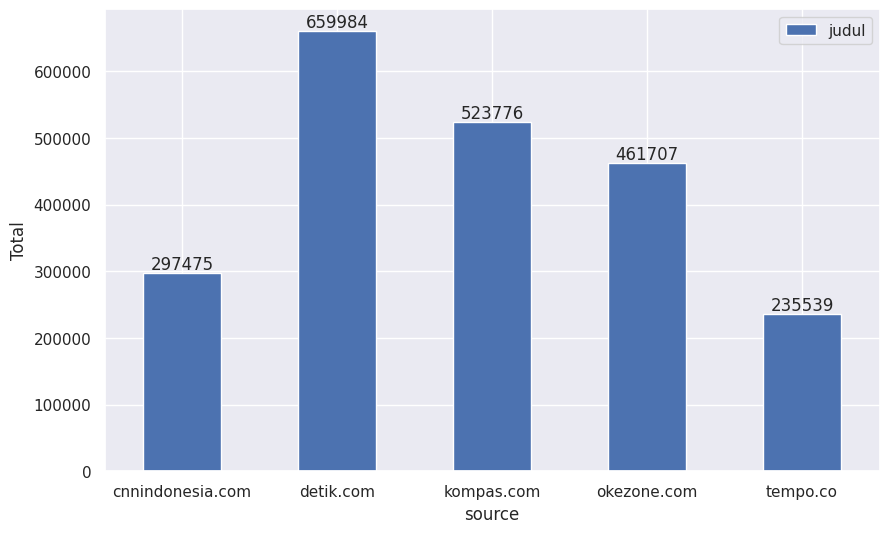

In [ ]:
ax = pd.DataFrame(df_berita.groupby(['source'])['judul'].count()).reset_index().plot(kind='bar', x='source', rot=0, figsize=(10, 6))
ax.bar_label(ax.containers[0])
plt.ylabel('Total')
plt.savefig('total data scraping.png')

In [ ]:
df_proporsi = pd.DataFrame(df_berita.groupby('label')['judul'].count()).reset_index()
df_proporsi.rename(columns = {'judul':'total'}, inplace = True)
df_proporsi

,label,total
0,clickbait,762748
1,non-clickbait,1415733


([<matplotlib.patches.Wedge at 0x798abbe8d930>,
 [Text(0.4989942070417584, 0.9803085133460623, 'clickbait'),
  Text(-0.4989941152586498, -0.9803085600652671, 'non-clickbait')],
 [Text(0.27217865838641364, 0.5347137345523976, '35%'),
  Text(-0.27217860832289986, -0.5347137600356002, '65%')])

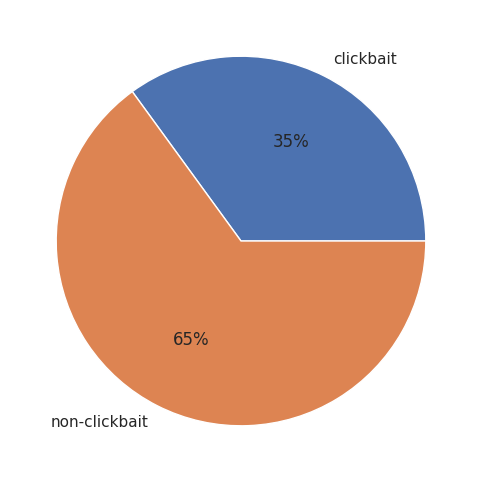

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df_proporsi['total'], labels=df_proporsi['label'], autopct='%.0f%%')

In [ ]:
df_sumber = pd.DataFrame(df_berita.groupby(['source','label'])['judul'].count()).reset_index().pivot(values='judul', columns='label', index='source').reset_index()
df_sumber = df_sumber.rename_axis(None, axis=1)
# df_sumber['cb'] = df_sumber['clickbait']/(df_sumber['clickbait'] + df_sumber['non-clickbait'])*100
# df_sumber['ncb'] = df_sumber['non-clickbait']/(df_sumber['clickbait'] + df_sumber['non-clickbait'])*100
# df_sumber.drop(['clickbait', 'non-clickbait'], axis=1, inplace=True)
# df_sumber.rename(columns = {'cb':'clickbait', 'ncb':'non-clickbait'}, inplace = True)
df_sumber

,source,clickbait,non-clickbait
0,cnnindonesia.com,78480,218995
1,detik.com,238290,421694
2,kompas.com,181211,342565
3,okezone.com,192472,269235
4,tempo.co,72295,163244


<Figure size 1200x800 with 0 Axes>

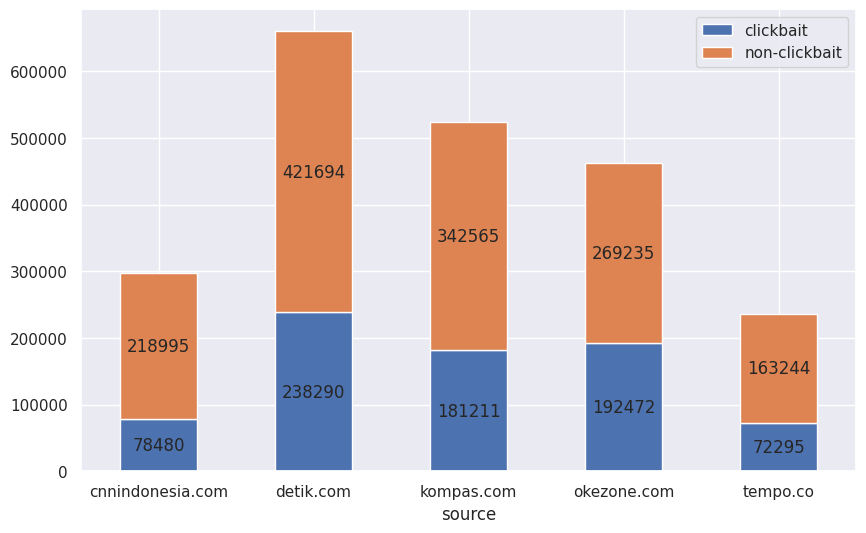

In [ ]:
plt.figure(figsize=(12,8))
ax = df_sumber.plot(kind='bar', stacked=True, x='source', rot=0, figsize=(10,6))
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f}'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

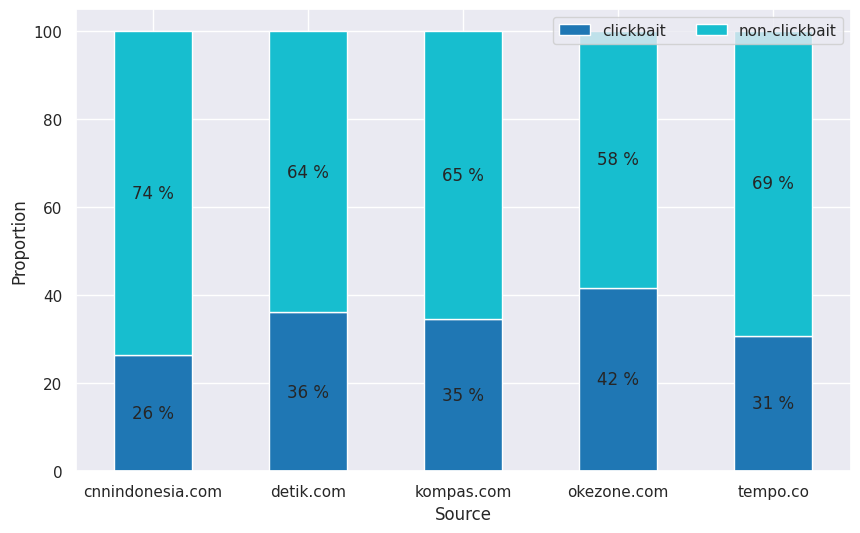

In [ ]:
sc_ct_prop = pd.crosstab(index=df_berita['source'],
                             columns=df_berita['label'],
                             normalize="index")

sc_ct_prop['clickbait'] = sc_ct_prop['clickbait'].apply(lambda x: x*100)
sc_ct_prop['non-clickbait'] = sc_ct_prop['non-clickbait'].apply(lambda x: x*100)
ax = sc_ct_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

plt.legend(loc="upper right", ncol=2)
plt.ylabel("Proportion")
plt.xlabel("Source")
plt.xticks(rotation=0)
plt.show()

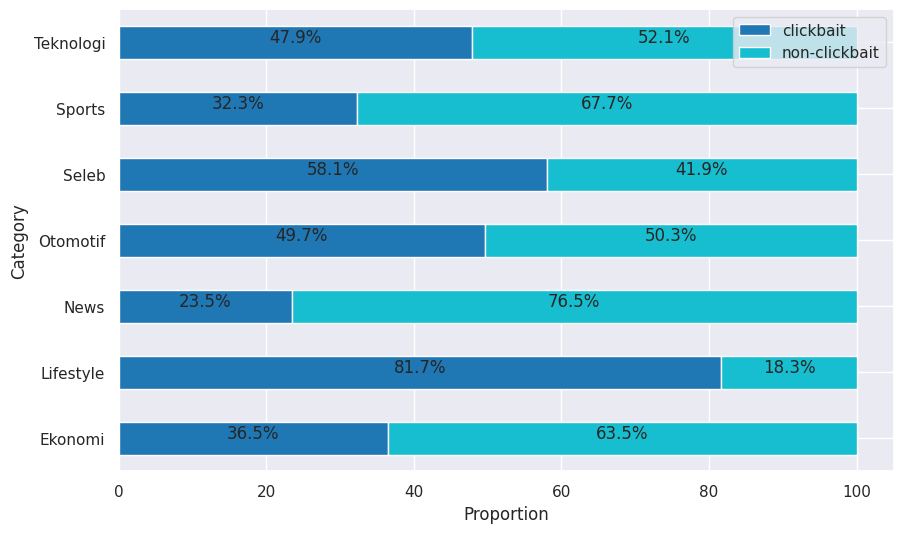

In [ ]:
cat_ct_prop = pd.crosstab(index=df_berita['kategori'],
                             columns=df_berita['label'],
                             normalize="index")

cat_ct_prop['clickbait'] = cat_ct_prop['clickbait'].apply(lambda x: x*100)
cat_ct_prop['non-clickbait'] = cat_ct_prop['non-clickbait'].apply(lambda x: x*100)

ax = cat_ct_prop.plot(kind='barh',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

for i, (category, row) in enumerate(cat_ct_prop.iterrows()):
    total = 0
    for j, value in enumerate(row):
        ax.annotate(f'{value:.1f}%', (total + value / 2, i), ha='center')
        total += value

plt.legend(loc="upper right", ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Category")
plt.show()

In [ ]:
df_ot = pd.DataFrame(df_berita.groupby(['new_date','label'])['judul'].count()).reset_index()
df_cbot = df_ot[df_ot['label']=='clickbait']
df_cbot

,new_date,label,judul
0,2020-01-01,clickbait,399
2,2020-01-02,clickbait,568
4,2020-01-03,clickbait,581
6,2020-01-04,clickbait,396
8,2020-01-05,clickbait,342
...,...,...,...
2300,2023-02-24,clickbait,779
2302,2023-02-25,clickbait,471
2304,2023-02-26,clickbait,479
2306,2023-02-27,clickbait,814


In [ ]:
df_cbotmonths = df_cbot.copy()
df_cbotmonths['new_date'] = df_cbotmonths['new_date'].str[:-3]
df_cbotmonths = pd.DataFrame(df_cbotmonths.groupby(['new_date','label'])['judul'].sum()).reset_index()
df_cbotmonths['new_date'] = pd.to_datetime(df_cbotmonths['new_date'])
df_cbotmonths

,new_date,label,judul
0,2020-01-01,clickbait,18550
1,2020-02-01,clickbait,18223
2,2020-03-01,clickbait,18010
3,2020-04-01,clickbait,18636
4,2020-05-01,clickbait,18411
5,2020-06-01,clickbait,20429
6,2020-07-01,clickbait,21518
7,2020-08-01,clickbait,19678
8,2020-09-01,clickbait,20052
9,2020-10-01,clickbait,20668


Text(0.5, 1.0, 'Trend Clickbait Keseluruhan')

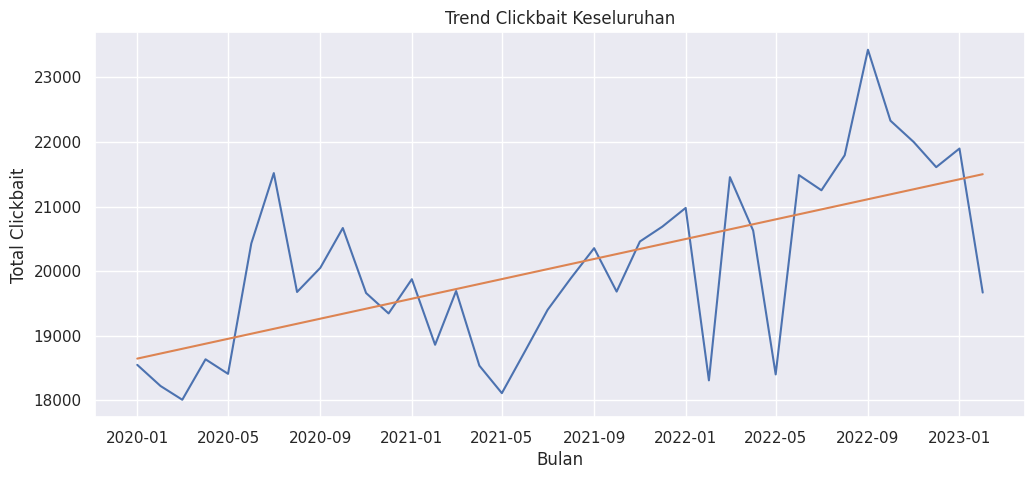

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_cbotmonths, x="new_date", y="judul")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
numeric_dates = mdates.date2num(df_cbotmonths.new_date)
m, b = np.polyfit(numeric_dates, df_cbotmonths.judul, 1)
plt.plot(df_cbotmonths.new_date, m * numeric_dates + b)
plt.xlabel('Bulan')
plt.ylabel('Total Clickbait')
plt.title('Trend Clickbait Keseluruhan')

In [ ]:
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=df_cbotmonths['new_date'],
                                y=df_cbotmonths['judul'],
                                marker_color='blue', text="total"))
fig.show()

In [ ]:
def make_dfcb_trend(df):
  df = df[df['label']=='clickbait'].copy()
  df['new_date'] = df['new_date'].str[:-3]
  df = pd.DataFrame(df.groupby(['new_date','label'])['judul'].sum()).reset_index()
  df['new_date'] = pd.to_datetime(df['new_date'])
  return df

In [ ]:
df_detik_cbot = pd.DataFrame(df_berita[df_berita['source'] == 'detik.com'].groupby(['new_date','label'])['judul'].count()).reset_index()
df_kompas_cbot = pd.DataFrame(df_berita[df_berita['source'] == 'kompas.com'].groupby(['new_date','label'])['judul'].count()).reset_index()
df_cnn_cbot = pd.DataFrame(df_berita[df_berita['source'] == 'cnnindonesia.com'].groupby(['new_date','label'])['judul'].count()).reset_index()
df_oke_cbot = pd.DataFrame(df_berita[df_berita['source'] == 'okezone.com'].groupby(['new_date','label'])['judul'].count()).reset_index()
df_tempo_cbot = pd.DataFrame(df_berita[df_berita['source'] == 'tempo.co'].groupby(['new_date','label'])['judul'].count()).reset_index()

In [ ]:
df_detik_cbot = make_dfcb_trend(df_detik_cbot)
df_kompas_cbot = make_dfcb_trend(df_kompas_cbot)
df_cnn_cbot = make_dfcb_trend(df_cnn_cbot)
df_oke_cbot = make_dfcb_trend(df_oke_cbot)
df_tempo_cbot = make_dfcb_trend(df_tempo_cbot)

In [ ]:
def make_graph_cbot_trend(df, source):
  plt.figure(figsize=(12,4))
  sns.lineplot(data=df, x="new_date", y="judul")
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  numeric_dates = mdates.date2num(df.new_date)
  m, b = np.polyfit(numeric_dates, df.judul, 1)
  plt.plot(df.new_date, m * numeric_dates + b)
  plt.xlabel('Bulan')
  plt.ylabel('Total Clickbait')
  plt.title(f'Trend Clickbait {source}')
  plt.savefig(f'trend {source}.png')
  plt.show()

In [ ]:
def persentase_kenaikan(awal, akhir):
  return (akhir-awal)/awal*100

def persentase_penurunan(awal, akhir):
  return (awal-akhir)/awal*100

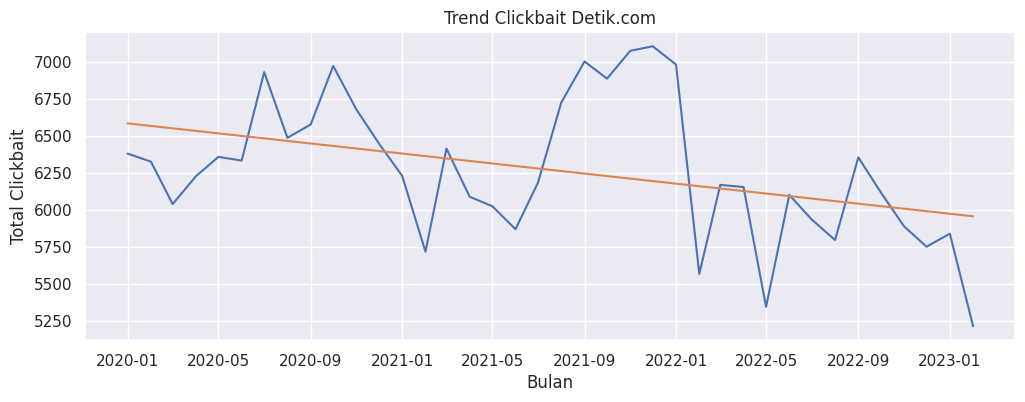

In [ ]:
make_graph_cbot_trend(df_detik_cbot, 'Detik.com')

In [ ]:
df_detik_cbot.iloc[[0, -1]]

,new_date,label,judul
0,2020-01-01,clickbait,6380
37,2023-02-01,clickbait,5213


In [ ]:
persentase_penurunan(6380,5213)

18.29153605015674

In [ ]:
df_detik_cbot['judul'].mean()

6270.789473684211

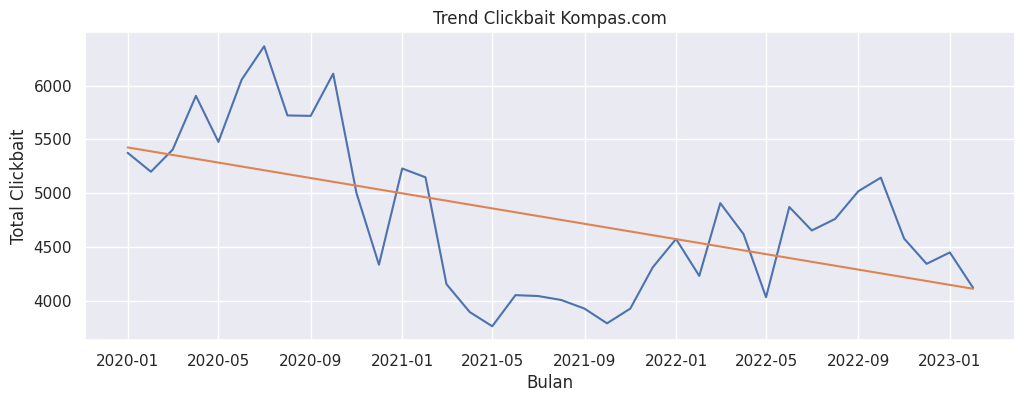

In [ ]:
make_graph_cbot_trend(df_kompas_cbot, 'Kompas.com')

In [ ]:
df_kompas_cbot.iloc[[0, -1]]

,new_date,label,judul
0,2020-01-01,clickbait,5375
37,2023-02-01,clickbait,4120


In [ ]:
persentase_penurunan(5375,4120)

23.348837209302324

In [ ]:
df_kompas_cbot['judul'].mean()

4768.710526315789

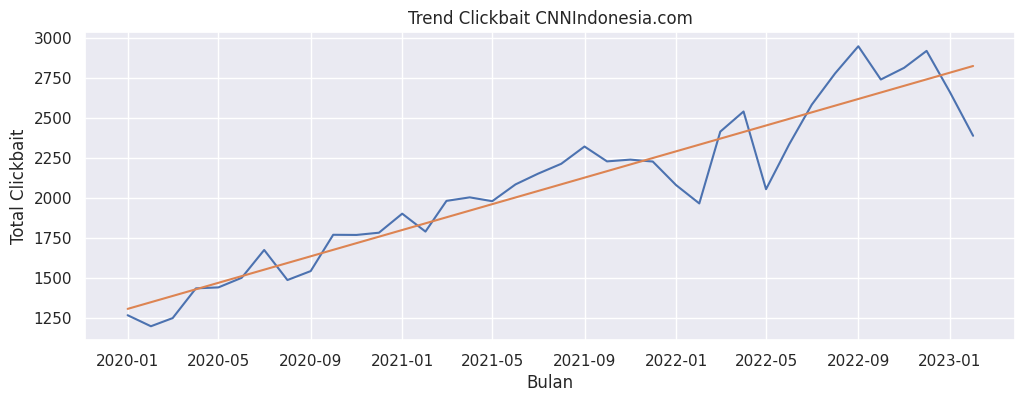

In [ ]:
make_graph_cbot_trend(df_cnn_cbot, 'CNNIndonesia.com')

In [ ]:
df_cnn_cbot.iloc[[0, -1]]

,new_date,label,judul
0,2020-01-01,clickbait,1267
37,2023-02-01,clickbait,2389


In [ ]:
persentase_kenaikan(1267,2389)

88.55564325177585

In [ ]:
df_cnn_cbot['judul'].mean()

2065.2631578947367

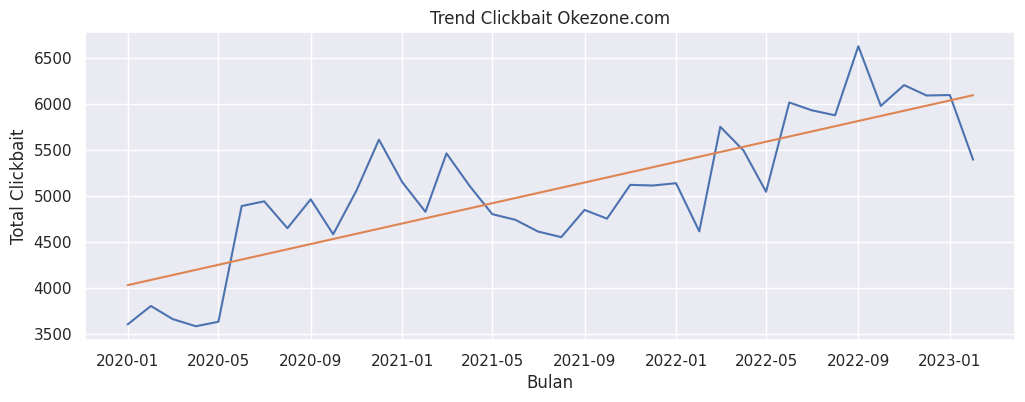

In [ ]:
make_graph_cbot_trend(df_oke_cbot, 'Okezone.com')

In [ ]:
df_oke_cbot.iloc[[0, -1]]

,new_date,label,judul
0,2020-01-01,clickbait,3608
37,2023-02-01,clickbait,5397


In [ ]:
persentase_kenaikan(3608,5397)

49.58425720620843

In [ ]:
df_oke_cbot['judul'].mean()

5065.0526315789475

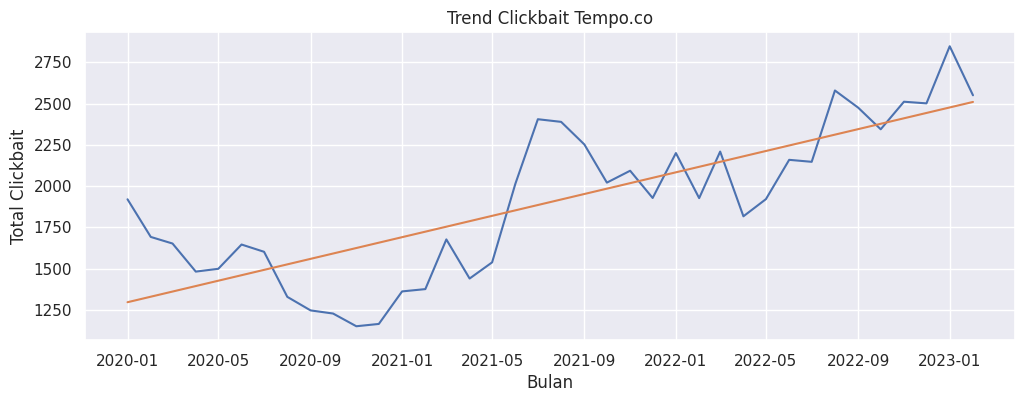

In [ ]:
make_graph_cbot_trend(df_tempo_cbot, 'Tempo.co')

In [ ]:
df_tempo_cbot.iloc[[0, -1]]

,new_date,label,judul
0,2020-01-01,clickbait,1920
37,2023-02-01,clickbait,2550


In [ ]:
persentase_kenaikan(1920,2550)

32.8125

In [ ]:
df_tempo_cbot['judul'].mean()

1902.5

# Tes

In [ ]:
import pandas as pd

In [ ]:
!gdown 18v9lXB2npoW2XPwsGS6K_HhvNJt8_zM0

Downloading...
From: https://drive.google.com/uc?id=18v9lXB2npoW2XPwsGS6K_HhvNJt8_zM0
To: /content/new_berita_inference_final1.csv
100% 277M/277M [00:03<00:00, 71.2MB/s]


In [ ]:
df_berita = pd.read_csv('/content/berita.csv', index_col=0)
df_berita['judul'] = df_berita['judul'].astype(str)
df_berita

In [ ]:
!gdown 13l06FTwI522kxZ-PaCdIAvrYl1KpZ0lV

Downloading...
From: https://drive.google.com/uc?id=13l06FTwI522kxZ-PaCdIAvrYl1KpZ0lV
To: /content/bert-model-retrain-final1.zip
100% 462M/462M [00:07<00:00, 60.7MB/s]


In [ ]:
import zipfile

folder_path = '/content/bert-model-retrain-final1.zip'
openZip = zipfile.ZipFile(folder_path, 'r')
openZip.extractall()
openZip.close()

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification, BertTokenizer, BertConfig
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score

In [ ]:
tf.keras.backend.clear_session()
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1',hidden_dropout_prob=.5,num_labels=2)
model.load_weights('/content/content/bert-model-retrain-final1.h5')

In [ ]:
text = ''
# Make predictions on new data
%%time
input_text_encoded = bert_tokenizer.encode_plus(
                        text,
                        add_special_tokens=True,
                        truncation=True,
                        max_length=32,
                        padding='max_length',
                        return_attention_mask=True,
                        return_token_type_ids=False,
                        return_tensors='tf'
                    )
test_input = input_text_encoded['input_ids'], input_text_encoded['attention_mask']
test_pred_logits = model.predict(test_input)[0]
test_pred_labels = np.argmax(test_pred_logits, axis=1)
test_pred_probs = tf.nn.softmax(test_pred_logits)[:, 1].numpy()

print('Test input : ', test_input)

#Print predictions
print(f"Text: {text})
print(f'Predicted label: {"clickbait" if test_pred_labels[i] == 1 else "non-clickbait"}')
print(f'Predicted probability: {test_pred_probs[i]}\n')